# Проект: Исследование рыночной стоимости объектов недвижимости

## Введение
Рынок недвижимости в Санкт-Петербурге отличается разнообразием цен в зависимости от местоположения и инфраструктуры. В данном проекте будет проведен анализ данных, предоставленных сервисом Яндекс Недвижимость, с целью построения модели, способной предсказывать стоимость объектов недвижимости. Это позволит автоматизировать процесс оценки недвижимости, выявлять аномалии и предотвращать возможные случаи мошенничества. 

## Цель исследования
Цель исследования — определить ключевые параметры, влияющие на рыночную стоимость квартир в Санкт-Петербурге и соседних населённых пунктах, а также разработать модель для прогнозирования цены объектов недвижимости.

## Описание данных
В исследовании используются данные сервиса Яндекс Недвижимость, содержащие два вида информации:
* Данные, введённые пользователями: включают такие параметры, как площадь квартиры, количество комнат, этажность и другие характеристики.
* Автоматически полученные данные: включают информацию о расстоянии до центра города, парков, водоёмов и других объектов инфраструктуры.

Использование данных, полученных как от пользователей, так и из геосервисов, позволит учесть широкий спектр факторов, влияющих на стоимость объектов.ы в объявлении
</div>

Признаки:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## План работы

<b>Шаг 1:</b> [Первичное изучение данных](#link1)
* Загрузка данных из CSV-файла в датафрейм с использованием библиотеки pandas.
* Анализ общей информации о данных.
* Построение гистограмм для всех числовых столбцов для выявления первичных распределений и аномалий.

<b>Шаг 2:</b> [Предобработка данных](#link2)
* Поиск и анализ пропущенных значений, заполнение или оставление пропусков в зависимости от их характера.
* Изменение типов данных в необходимых столбцах для корректной работы с ними.
* Обработка и устранение неявных дубликатов в столбце с названиями населённых пунктов.

<b>Шаг 3:</b> [Создание новых признаков](#link3)
* Расчёт цены за квадратный метр.
* Определение дня недели, месяца и года публикации объявления.
* Классификация типа этажа (первый, последний, другой).
* Вычисление расстояния до центра города в километрах.

<b>Шаг 4:</b> [Исследовательский анализ данных](#link4)
* Построение гистограмм для ключевых параметров, таких как общая площадь, жилая площадь, цена объекта и других.
* Обработка аномалий в данных, включая исправление или удаление выбивающихся значений.
* Анализ времени продажи квартир и определение факторов, влияющих на длительность продажи.
* Построение графиков зависимости цены от различных параметров, включая площадь квартиры, количество комнат, тип этажа и дату размещения объявления.
* Определение средней цены квадратного метра в населённых пунктах с наибольшим числом объявлений и анализ зависимости стоимости квартир от расстояния до центра города.

<b>Шаг 5:</b> [Общий вывод](#link5)
* Описание полученных результатов исследования.
* Формулировка выводов и рекомендаций на основе проведённого анализа.

## Подготовка рабочего пространства

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a class='anchor' id="link1"></a>
## 1 Первичное изучение данных

Откроем файл с данными и выведем верхние строчки таблицы.

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None) # для отображения всех столбцов
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучим общую информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 22 колонок и 23699 строк. В таблице имеются пропуски.

Три столбца имеют стилистические ошибки в названии. Необходимо привести названия к правильному стилю.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных могут быть вбросы и ошибки:
* В столбце **last_price (последняя цена)** минимальное значение 12190 рублей
* В столбце **rooms (число комнат)** минимальное число 0
* В столбце **ceiling_height (высота потолков)** минимальная высота 1 метр, а максимальная 100 метров
* В столбце **living_area (жилая площадь)** минимальная площадь 2 метра квадратных

Построим гистограммы для всех числовых столбцов таблицы.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

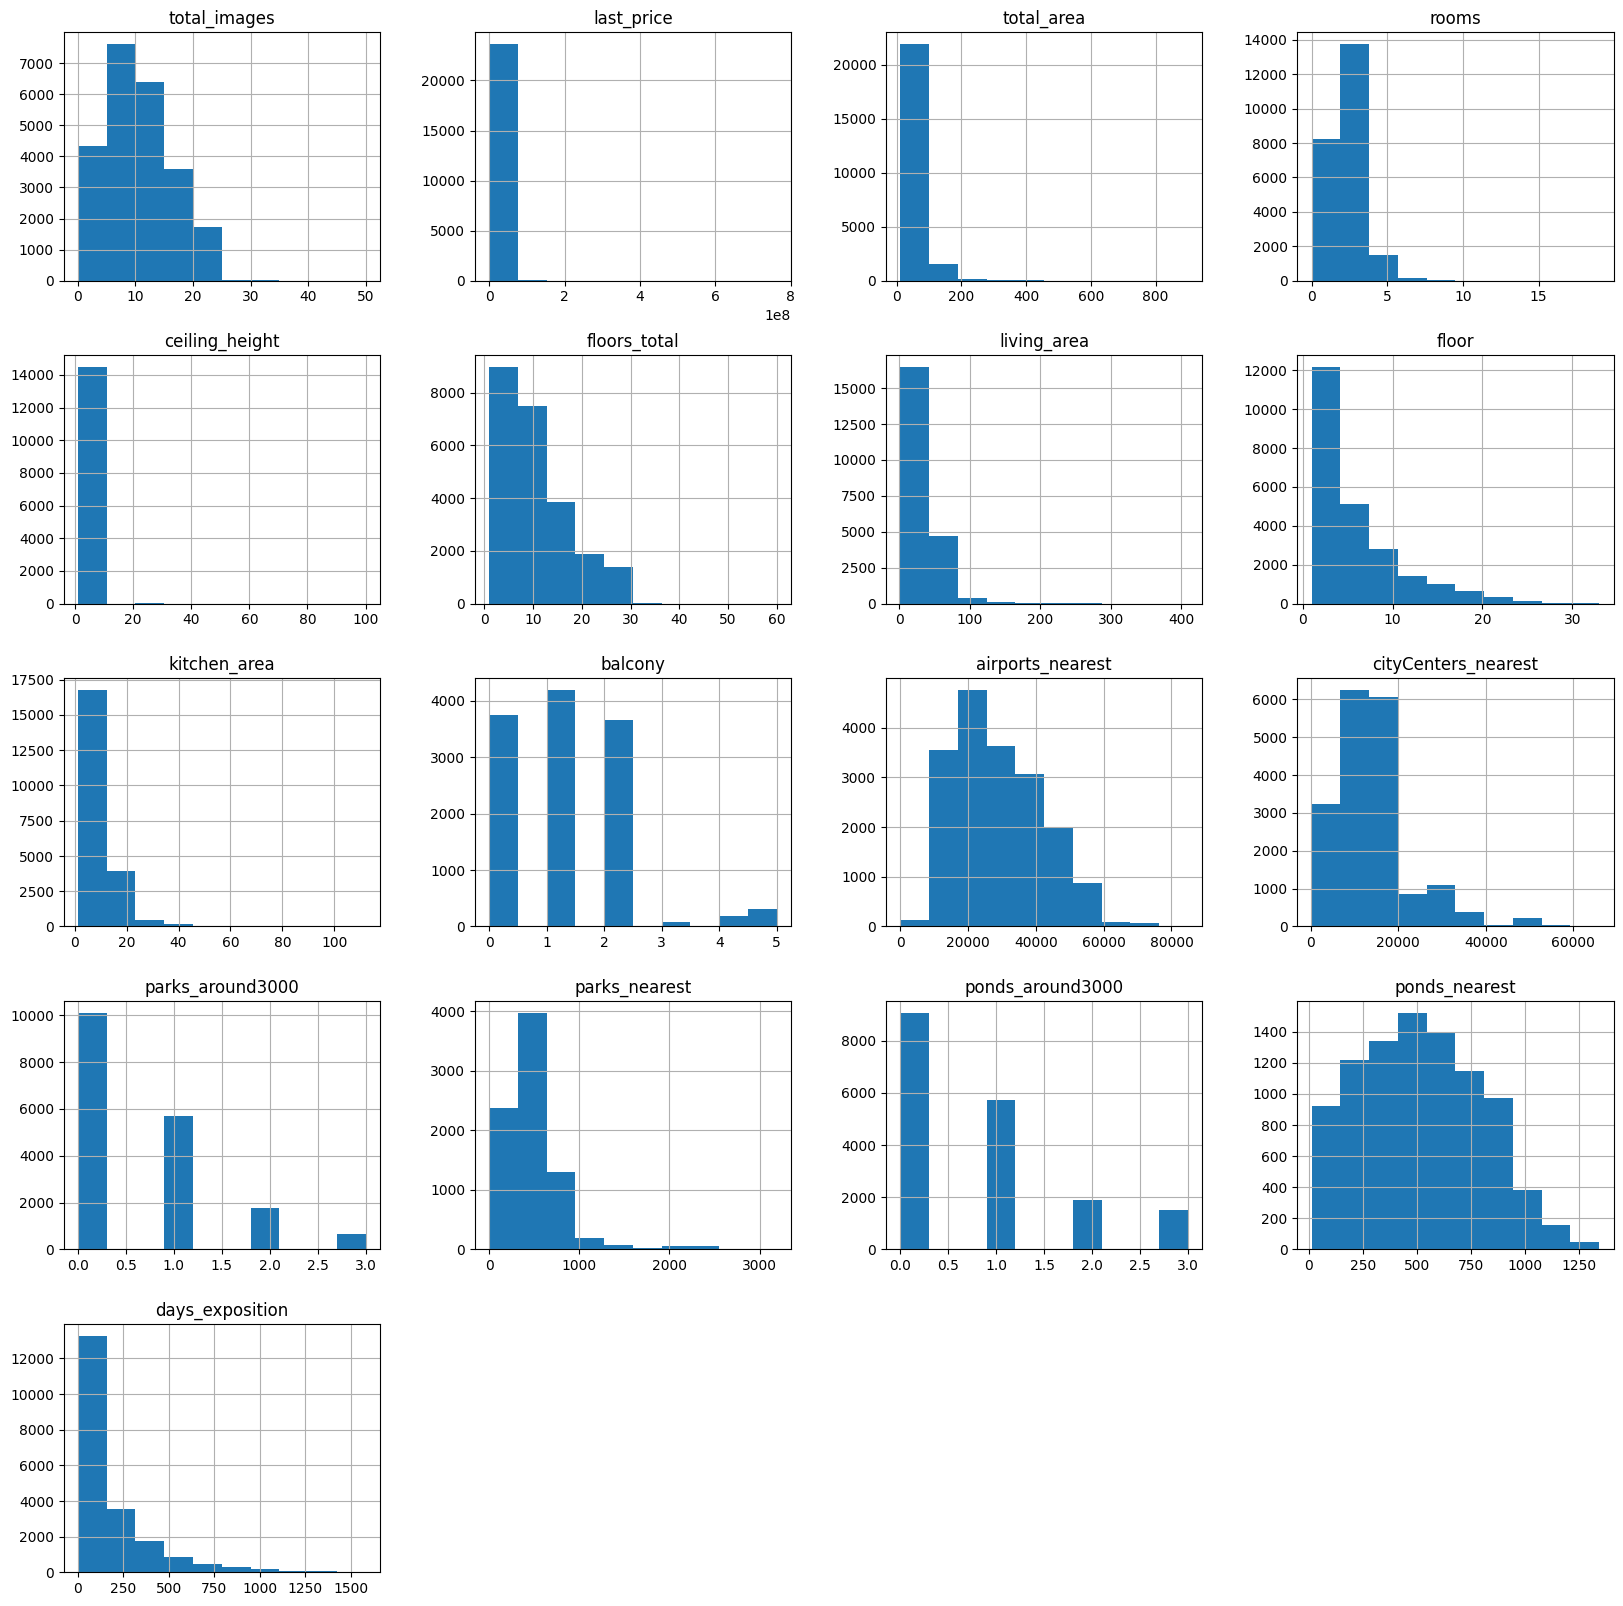

In [6]:
data.hist(figsize=(20, 20))

Кртакий обзор гистограмм показал, что большая часть данных соответствуют распределению Пуассона. В столбцах **last_price**, **ceiling_height** могут быть вбросы. Также стоит внимательнее посмотреть на квартиры с большой площадью и большим количеством комнат, в этих данных также могут быть ошибки.

**Промежуточный итог:**

Данные успешно загружены. 
Обзор общей информации о данных показал, что в данных имеются пропуски и ошибки. Перед исследованием необходимо провести предобработку данных.

<a class='anchor' id="link2"></a>
## 2 Предобработка данных

**2.1 Поиск явных дубликатов**

In [7]:
data.duplicated().sum()

np.int64(0)

Повторяющихся строк в таблице нет.

**2.2 Приведение названий к змеиному стрилю**

Три столбца имеют стилистические ошибки в названии. Необходимо привести названия к правильному стилю.

In [8]:
data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
}, inplace=True)

data.sample(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
9942,10,5070000.0,42.0,2017-12-14T00:00:00,1,2.8,22.0,18.0,7,NaN,False,False,11.0,2.0,Санкт-Петербург,52212.0,16802.0,0.0,NaN,1.0,733.0,117.0


**2.3 Обработка пропусков**

Найдем количество пропущенных значений

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим на доли пропусков по столбцам

In [10]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Количество пропусков в столбцах floors_total и locality_name относительно небольшое, поэтому пропуски можно удалить.

**Обработка пропусков в столбце "Высота потолков"**

9195 ячеек из 23699 пропущены. Можно предположить, что продавцы не посчитали нужным указывать высоту потолков, потому что высота стандартная. Можно заменить пропуски на медианное значение высоты потолков в выборке. Однако это повлияет на точность дальнейшего анализа. Предлагаем оставить пропуски.

**Обработка пропусков в столбцах "Всего этажей в доме" и "Название населённого пункта"**

Поробнее изучим информацию в строках с пропусками в столбцах "Всего этажей в доме" и "Название населённого пункта".

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around_3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around_3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

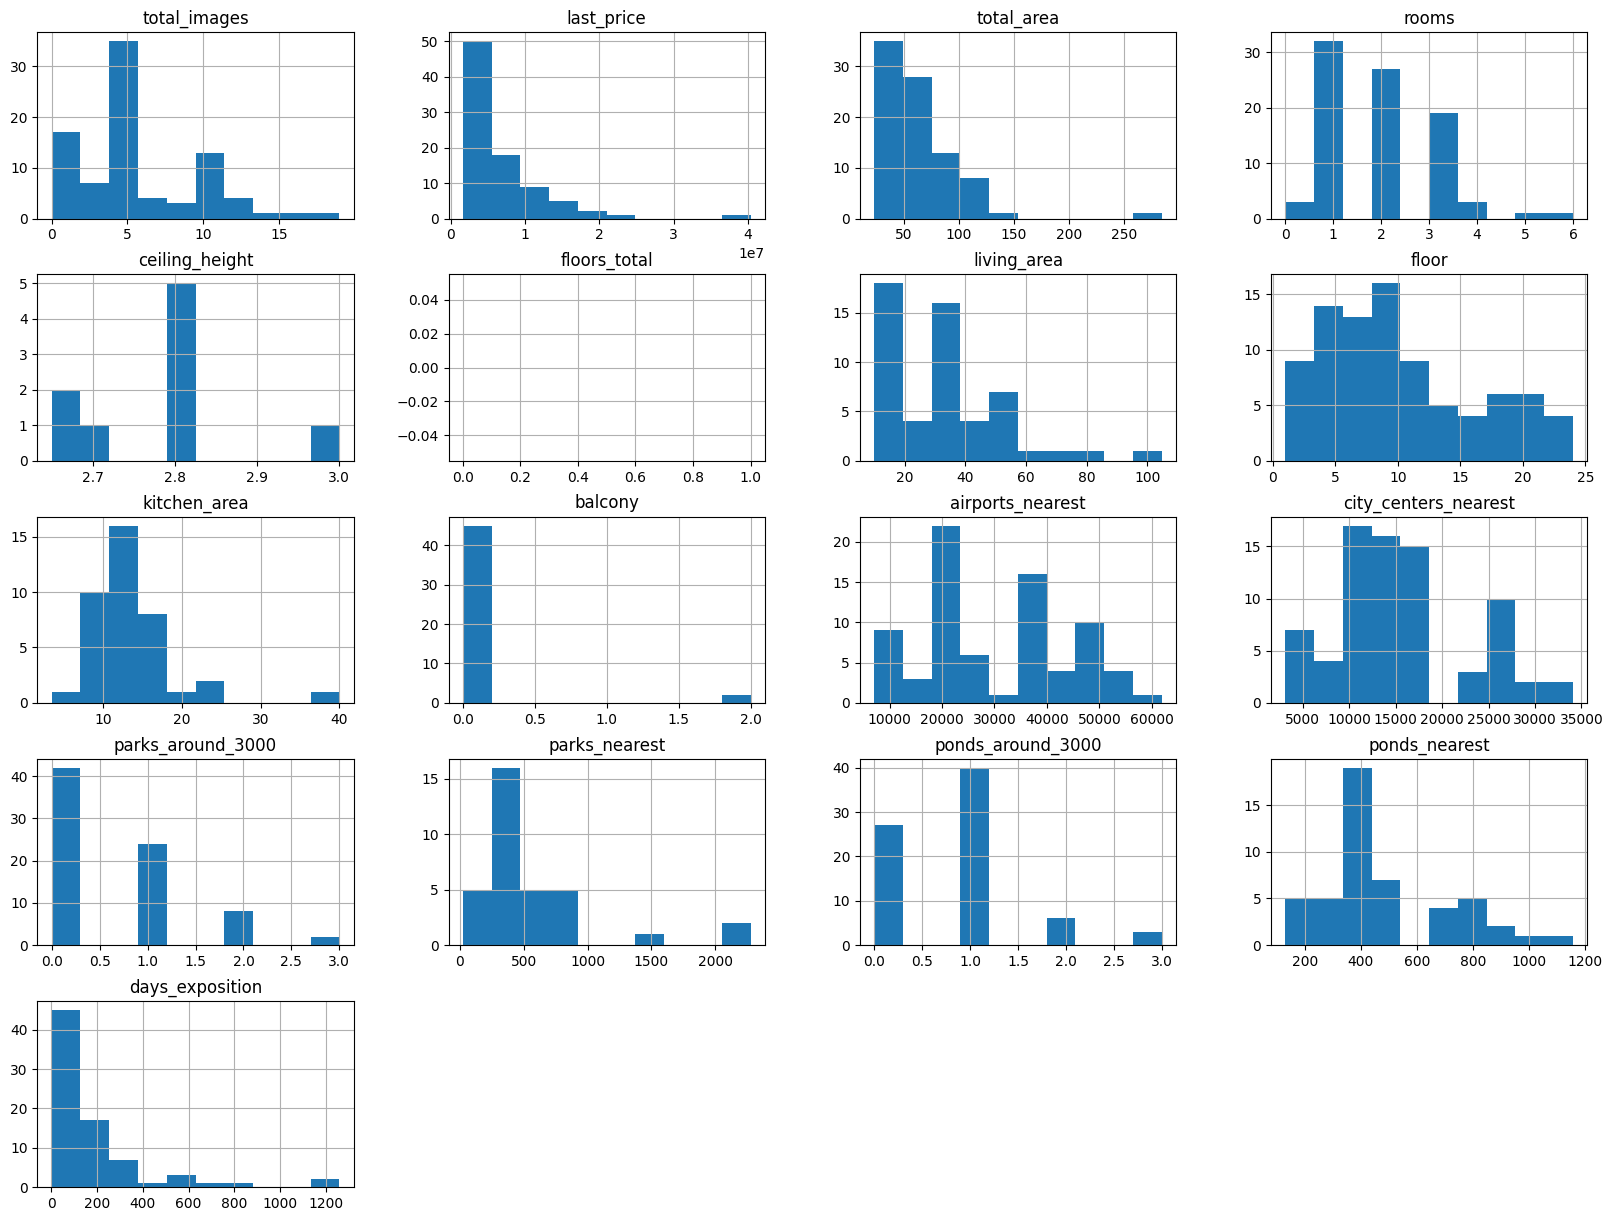

In [11]:
data[data['floors_total'].isna()].hist(figsize=(20, 15))

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around_3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around_3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

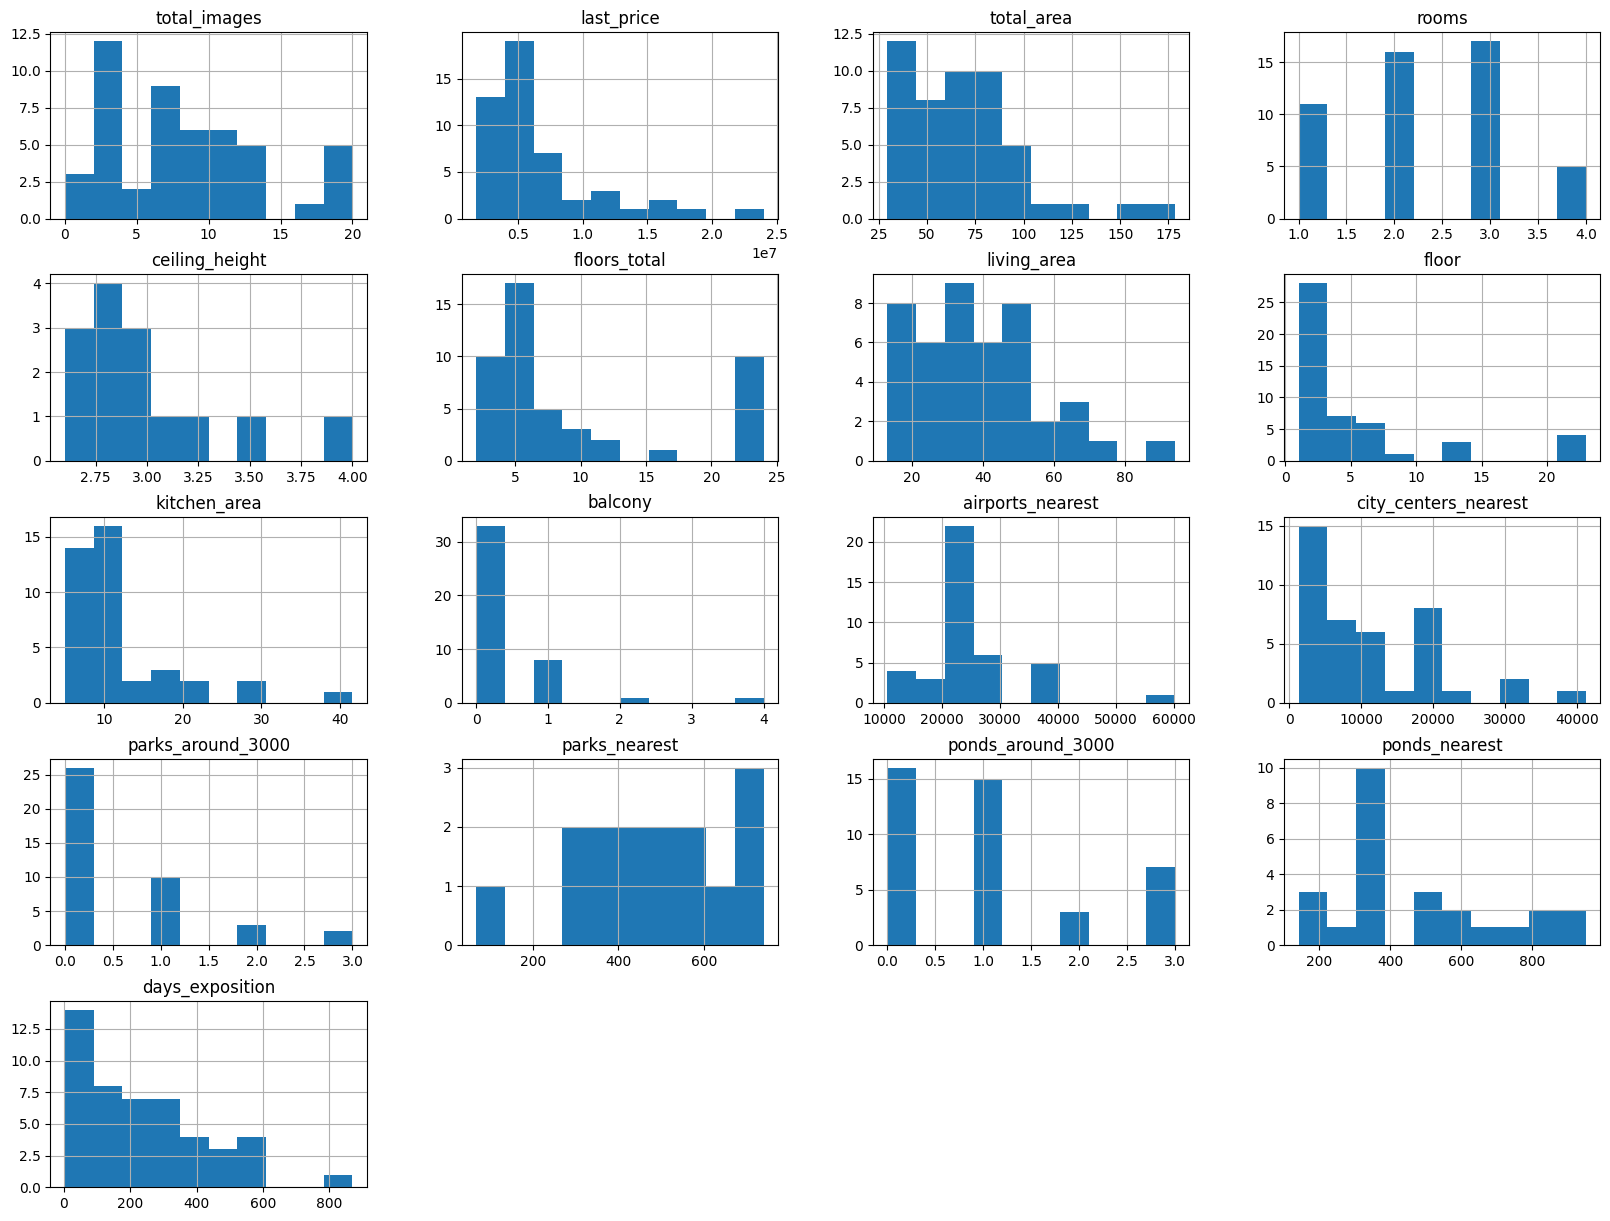

In [12]:
data[data['locality_name'].isna()].hist(figsize=(20, 15))

Анализ информации и гистограмм показал, что квартиры, с пропусками в в столбцах "Всего этажей в доме" и "Название населённого пункта" не имеют принципиальных отличий от остальных квартир. Количество пропусков в данных столбцах относительно небольшое, поэтому можно эти строки удалить.

In [13]:
data = data[(data['floors_total'].isna() == False) & (data['locality_name'].isna() == False)]

Проверим, что строки с пропусками удалились.

In [14]:
data['floors_total'].isna().sum()

np.int64(0)

In [15]:
data['locality_name'].isna().sum()

np.int64(0)

**Обработка пропусков в столбцах "Жилая площадь" и "Площадь кухни"**

Посмотрим какой процент от всей таблицы занимают строки с пропусками.

In [16]:
data['living_area'].isna().sum() / (data['living_area'].isna().sum() + data['living_area'].isna().count())

np.float64(0.07333857648446716)

In [17]:
data['kitchen_area'].isna().sum() / (data['kitchen_area'].isna().sum() + data['kitchen_area'].isna().count())

np.float64(0.08616744871446853)

Проверим не превышет ли сумма кухонной и жилой площади общую площадь квартиры.

In [18]:
data['wrong_area'] = (data['living_area'] + data['kitchen_area']) > data['total_area']
data['wrong_area'].sum()

np.int64(64)

В данных явная ошибка. Предлагается такие объекты из таблицы удалить.

In [19]:
data = data[data['wrong_area'] == False]
data['wrong_area'].sum()

np.int64(0)

Посмотрим насколько коррелируют данные в столцах "Общая площадь" и "Жилая площадь".

In [20]:
data['total_area'].corr(data['living_area'])

np.float64(0.9403411766964112)

Посмотрим насколько коррелируют данные в столцах "Общая площадь" и "Площадь кухни".

In [21]:
data['total_area'].corr(data['kitchen_area'])

np.float64(0.611401220455473)

Заполнение пропусков искуственными данными повлияет на точность дальнейшего анализа данных. Удалив данные строки мы потеряем значительную часть информации. Корреляция между площадью квартиры и жилой площадью очень высокая. Также прослеживается корреляция между площадью квартиры и площадью кухни. 

Предлагается строки с пропусками в столбцах "Жилая площадь" и "Площадь кухни" оставить, но при анализе иметь ввиду наличие пропусов в данных столбцах.

**Обработка пропусков в столбце "Апартаменты"**

Предполагается, что если продавец не указал информацию о том является его недвижимость апартаментами, то ответ "Нет".

Заменим все пропуски на False.

In [22]:
data['is_apartment'] = data['is_apartment'].eq(True)

Проверим, что все пропуски заполнены.

In [23]:
data['is_apartment'].isna().sum()

np.int64(0)

**Обработка пропусков в столбце "Число балконов"**

Предполагается, что если продавец не указал информацию о количестве балконов, то их в квартире нет.

Заменим все пропуски на 0.

In [24]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, что все пропуски заполнены.

In [25]:
data['balcony'].isna().sum()

np.int64(0)

**Пропуски в столбцах "Расстояние до ближайшего аэропорта", "Расстояние до центра города", "Число парков в радиусе 3 км", "Расстояние до ближайшего парка", "Число водоёмов в радиусе 3 км", "Расстояние до ближайшего водоёма"**

Визуально осмотрев таблицу можно заметить что: 
* Большинство пропусков в данных столбцах встечаются не в Санкт-Петербурге, а в других населенных пунктах
* Если в радиусе 3 км отсутствует парк или водоем, в столбцах с расстоянием до ближайшего парка или водоема проставлен пропуск

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9062
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5504
city_centers_nearest     5481
parks_around_3000        5480
parks_nearest           15489
ponds_around_3000        5480
ponds_nearest           14483
days_exposition          3163
wrong_area                  0
dtype: int64

In [27]:
data[data['locality_name'] == 'Санкт-Петербург'].isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          5541
floors_total               0
living_area             1117
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1343
balcony                    0
locality_name              0
airports_nearest          84
city_centers_nearest      60
parks_around_3000         60
parks_nearest           8378
ponds_around_3000         60
ponds_nearest           7693
days_exposition         2069
wrong_area                 0
dtype: int64

In [28]:
data[(data['parks_around_3000'] == 0) | (data['ponds_around_3000'] == 0)].isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           4862
floors_total                0
living_area               898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1102
balcony                     0
locality_name               0
airports_nearest           17
city_centers_nearest        1
parks_around_3000           0
parks_nearest           10009
ponds_around_3000           0
ponds_nearest            9003
days_exposition          1603
wrong_area                  0
dtype: int64

Действительно в Санкт-Петербурге только для 84 объектов не определено расстояние до аэропорта и по 60 объектов не имеют данных о расстоянии до ближайшего парка, водоема и центра города. Остальные объекты недвижимости с пропусками в данных столбцах находятся в прочих населенных пунктах.

Действительно, для объектов, у которых в радиусе 3 км отсутствует парк или водоем, в столбцах с расстоянием до ближайшего парка или водоема проставлен пропуск.

В данном случае пропуски можно считать важной информацией и заполнять их не нужно.

Так как данные столбцы заполняются автоматически, появление пропусков в данных столбцах можно связать с особенностями работы программы.

**Пропуски в столбце "Сколько дней было размещено объявление (от публикации до снятия)"**

Посмотрим что есть общего у объектов с пропусками в данном столбце.

In [29]:
data[data['days_exposition'].isna() == True].head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,False
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,False
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,False,False,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,False
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,False
49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,False,False,6.00,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,False
52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,False,False,11.00,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,False
71,20,4850000.0,57.50,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,False,False,6.20,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,False
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,False,False,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
84,11,2400000.0,43.90,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,False,False,5.20,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Большая часть объявлений была размещена в 2019 году, в то время как в таблице имеется информация об объектах начиная с 2015 года.

Можно предположить, что отсутствие данных в данном столбце говорит о том, что данное объявление еще размещено на сайте.

Пропуски в данном столбце являются важной информацией и заполнять их не нужно.

**2.4 Приведение типов данных**

Рассмотрим типы данных в каждом столбце

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23501 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23501 non-null  int64  
 1   last_price            23501 non-null  float64
 2   total_area            23501 non-null  float64
 3   first_day_exposition  23501 non-null  object 
 4   rooms                 23501 non-null  int64  
 5   ceiling_height        14439 non-null  float64
 6   floors_total          23501 non-null  float64
 7   living_area           21636 non-null  float64
 8   floor                 23501 non-null  int64  
 9   is_apartment          23501 non-null  bool   
 10  studio                23501 non-null  bool   
 11  open_plan             23501 non-null  bool   
 12  kitchen_area          21279 non-null  float64
 13  balcony               23501 non-null  float64
 14  locality_name         23501 non-null  object 
 15  airports_nearest      17

В таблице имеются столбцы с типом данных float64 (вещественные числа), при этом значения столбцов являются целыми числами. 

В следующих столбцах предлагается преобразовать тип данных с float64 на int64:
* last_price
* floors_total
* balcony

В следующих столбцах также нужно преобразовать тип данных на целочисленный, но стобцы содержат пропущенные значения. Поэтому заменим тип данных с float64 на Int64
* airports_nearest
* city_centers_nearest
* parks_around_3000
* ponds_nearest
* days_exposition

In [31]:
temp_df = data['airports_nearest']%1
temp_df.unique()

array([ 0., nan])

In [32]:
columns_to_int64 = ['last_price', 'floors_total', 'balcony']
columns_to_Int64 = ['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'ponds_nearest']

data[columns_to_int64] = data[columns_to_int64].astype('int')
data[columns_to_Int64] = data[columns_to_Int64].astype('Int64')

# при преобразовании типа данных в столбце `days_exposition` выдавалать ошибкаю Для решения ошибки округлим значения перед изменением типа данных
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23501 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23501 non-null  int64  
 1   last_price            23501 non-null  int64  
 2   total_area            23501 non-null  float64
 3   first_day_exposition  23501 non-null  object 
 4   rooms                 23501 non-null  int64  
 5   ceiling_height        14439 non-null  float64
 6   floors_total          23501 non-null  int64  
 7   living_area           21636 non-null  float64
 8   floor                 23501 non-null  int64  
 9   is_apartment          23501 non-null  bool   
 10  studio                23501 non-null  bool   
 11  open_plan             23501 non-null  bool   
 12  kitchen_area          21279 non-null  float64
 13  balcony               23501 non-null  int64  
 14  locality_name         23501 non-null  object 
 15  airports_nearest      17

Изменение типов данных прошло успешно

**Столбец дата публикации**

Столбец first_day_exposition содержит в себе информацию о дате публикации. Для дальнейшего анализа необходимо перевести значения столбца в объекты datetime.

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482.0,2.0,755,<NA>,False
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0.0,<NA>,81,False
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90.0,2.0,574,558,False
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84.0,3.0,234,424,False
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112.0,1.0,48,121,False


**2.5 Поиск неявных дубликатов**

**Изучим уникальные значения в столбце с названиями населенных пунктов**

In [34]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В названиях насененных пунктов встречаются неявные дубликаты. Создадим новый столбец и запишем в него отчищенные от дубликаков названия.

In [35]:
data['normalized_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ', 'городской посёлок ', 'деревня ', 'коттеджный поселок ', 'коттеджный посёлок ', 
              'поселок городского типа имени ', 'посёлок городского типа имени ', 'поселок городского типа ', 
              'посёлок городского типа ', 'поселок станции ', 'посёлок станции ', 'поселок при железнодорожной станции ',
              'посёлок при железнодорожной станции ', 'садоводческое некоммерческое товарищество ', 
              'садовое товарищество ', 'село ', 'поселок ', 'посёлок '], '', regex=True)
) 
data['normalized_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

**Попробуем очистить названия от неявных дубликатов автоматическим способом**

Создадим функцию, которая будет внутри каждого названия оставлять только то слово, которое начинается с заглавной буквы, а остальные отсеивать.

Отчищенные от дубликаков названия запишем в новый столбец.

In [36]:
def filter_name(location_name):
    words = location_name.split()
    location_name = [word for word in words if word[0].isupper()]
    return ' '.join(location_name)

data['normalized_name_var_2'] = data['locality_name'].apply(filter_name)

In [37]:
data.sample(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2
14468,12,7400000,46.40,2019-04-08,1,2.70,7,22.10,7,False,False,False,12.3,0,Санкт-Петербург,16008,9027,0,NaN,0.0,<NA>,<NA>,False,Санкт-Петербург,Санкт-Петербург
21607,11,4500000,51.30,2018-01-05,2,2.55,9,31.00,8,False,False,False,8.0,1,Санкт-Петербург,25834,14115,0,NaN,0.0,<NA>,206,False,Санкт-Петербург,Санкт-Петербург
171,6,3800000,49.00,2019-02-22,2,2.50,9,38.00,8,False,False,False,10.0,1,посёлок Шушары,18471,24272,0,NaN,0.0,<NA>,11,False,Шушары,Шушары
2837,10,6700000,57.00,2018-07-10,2,2.75,12,32.80,4,False,False,False,9.3,0,Санкт-Петербург,14727,16771,0,NaN,0.0,<NA>,28,False,Санкт-Петербург,Санкт-Петербург
4018,13,11500000,106.00,2017-09-02,4,NaN,6,70.00,3,False,False,False,15.0,0,Санкт-Петербург,31843,5167,2,270.0,3.0,783,115,False,Санкт-Петербург,Санкт-Петербург
18147,10,4550000,38.40,2018-08-04,1,NaN,25,20.00,17,False,False,False,10.4,0,Санкт-Петербург,10815,14727,0,NaN,1.0,525,24,False,Санкт-Петербург,Санкт-Петербург
1902,5,2500000,39.00,2015-12-17,1,NaN,4,18.00,3,False,False,False,9.0,0,деревня Малое Верево,<NA>,<NA>,<NA>,NaN,NaN,<NA>,279,False,Малое Верево,Малое Верево
3719,8,3100000,48.80,2017-05-12,1,NaN,6,28.90,1,False,False,False,12.1,0,Санкт-Петербург,22774,3082,1,286.0,3.0,155,80,False,Санкт-Петербург,Санкт-Петербург
7582,4,2050000,33.00,2018-10-24,1,NaN,25,16.00,12,False,False,False,9.0,0,посёлок Парголово,44507,20682,0,NaN,0.0,<NA>,37,False,Парголово,Парголово
3316,1,6380000,46.90,2019-02-09,2,2.50,12,26.60,5,False,False,False,9.0,0,Санкт-Петербург,39670,8930,0,NaN,1.0,57,18,False,Санкт-Петербург,Санкт-Петербург


In [38]:
len(data['locality_name'].sort_values().unique())

364

In [39]:
len(data['normalized_name'].sort_values().unique())

305

In [40]:
len(data['normalized_name_var_2'].sort_values().unique())

305

Было найдено 59 дубликатов в названиях населенных пунктов.

Оба метода обработки неявных дубликатов дали одинаковый результат.

**Промежуточный итог:**

Данные были очищены от неявных дубликатов, данные приведены к нужным типам, названия столбцов приведены к змеиному стилю.

Особое внимание уделено обработке пропущенных данных: 
* Пропуски в столбце "Высота потолков" были оставленны без изменения, потому что это могло бы повлиять на дальнейшее исследование.
* Пропущенные значения в столбцах "Высота потолков", "Апартаменты" и "Число балконов" были заполнены
* Строки с пропусками в столбцах "Всего этажей в доме" и "Название населённого пункта" были удалены
* Пропуски в столбцах "Расстояние до ближайшего аэропорта", "Расстояние до центра города", "Число парков в радиусе 3 км", "Расстояние до ближайшего парка", "Число водоёмов в радиусе 3 км", "Расстояние до ближайшего водоёма", "Сколько дней было размещено объявление (от публикации до снятия)" появились в связи с особенностями работы сервиса Яндекс.Недвижимость. Данные пропуски несут в себе информацию, поэтому удалять или заполнять их не нужно.

<a class='anchor' id="link3"></a>
## 3 Создание новых признаков

Добавим в таблицу столбец с ценой одного квадратного метра.

In [41]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

Добавим в таблицу столбцы с днем недели, месяцем и годом публикации.

In [42]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим в таблицу столбец с указанием типа этажа квартиры (значения — «‎первый», «последний», «другой»).

In [43]:
# создадим функцию для определения типа этажа
def determine_floor_type(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(lambda row: determine_floor_type(row['floor'], row['floors_total']), axis=1)


Добавим в таблицу столбец с расстоянием до центра города в километрах.

In [44]:
data['city_centers_km'] = (data['city_centers_nearest']/1000).round()

Проверим результат добавления новых столбцов.

In [45]:
data.sample(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
1383,20,18000000,98.40,2019-03-14,3,3.00,5,62.600000,3,False,False,False,9.60,0,Санкт-Петербург,33157,4551,1,240.0,0.0,<NA>,<NA>,False,Санкт-Петербург,Санкт-Петербург,182926.829268,3,3,2019,другой,5.0
17026,5,5200000,30.00,2017-04-23,1,NaN,5,14.000000,4,False,False,False,7.00,0,Санкт-Петербург,23974,3541,2,380.0,3.0,369,77,False,Санкт-Петербург,Санкт-Петербург,173333.333333,6,4,2017,другой,4.0
2560,6,1800000,37.00,2017-09-05,1,2.60,5,17.000000,5,False,False,False,9.00,0,городской поселок Большая Ижора,<NA>,<NA>,<NA>,NaN,NaN,<NA>,136,False,Большая Ижора,Большая Ижора,48648.648649,1,9,2017,последний,<NA>
17629,2,4990000,54.00,2017-04-11,2,NaN,12,NaN,9,False,False,False,NaN,0,Санкт-Петербург,33053,14217,2,293.0,2.0,289,45,False,Санкт-Петербург,Санкт-Петербург,92407.407407,1,4,2017,другой,14.0
759,16,4350000,38.00,2017-04-10,1,NaN,6,23.000000,5,False,False,False,10.00,1,Санкт-Петербург,20881,4465,1,937.0,3.0,167,37,False,Санкт-Петербург,Санкт-Петербург,114473.684211,0,4,2017,другой,4.0
8007,17,7100000,60.00,2018-08-12,2,NaN,25,NaN,2,False,False,False,NaN,0,посёлок Парголово,52768,17994,0,NaN,0.0,<NA>,60,False,Парголово,Парголово,118333.333333,6,8,2018,другой,18.0
14701,15,9700000,130.00,2017-11-02,4,3.26,7,75.000000,4,False,False,False,18.00,0,Санкт-Петербург,24406,4974,1,330.0,0.0,<NA>,145,False,Санкт-Петербург,Санкт-Петербург,74615.384615,3,11,2017,другой,5.0
1519,13,22000000,174.00,2014-12-10,4,2.80,4,80.900000,2,False,False,False,17.60,0,Петергоф,35416,30605,2,47.0,1.0,907,1133,False,Петергоф,Петергоф,126436.781609,2,12,2014,другой,31.0
1522,16,3500000,41.50,2018-10-05,2,2.50,5,27.000000,2,False,False,False,5.50,0,Санкт-Петербург,19258,18261,1,692.0,1.0,523,66,False,Санкт-Петербург,Санкт-Петербург,84337.349398,4,10,2018,другой,18.0
21422,16,6900000,46.00,2019-03-18,2,NaN,17,27.000000,16,False,False,False,9.00,0,Санкт-Петербург,33564,14616,0,NaN,1.0,859,<NA>,False,Санкт-Петербург,Санкт-Петербург,150000.000000,0,3,2019,другой,15.0


**Промежуточный итог:**

Все операции по добавлению новых столбцов прошли успешно.

<a class='anchor' id="link4"></a>
## 4 Исследовательский анализ данных

**Изучим параметр "общая площадь"**

Посмотрим на сводную статистику и гистограмму для столбца "total_area"

In [46]:
data['total_area'].describe()

count    23501.000000
mean        60.354173
std         35.688231
min         12.000000
25%         40.000000
50%         52.000000
75%         69.710000
max        900.000000
Name: total_area, dtype: float64

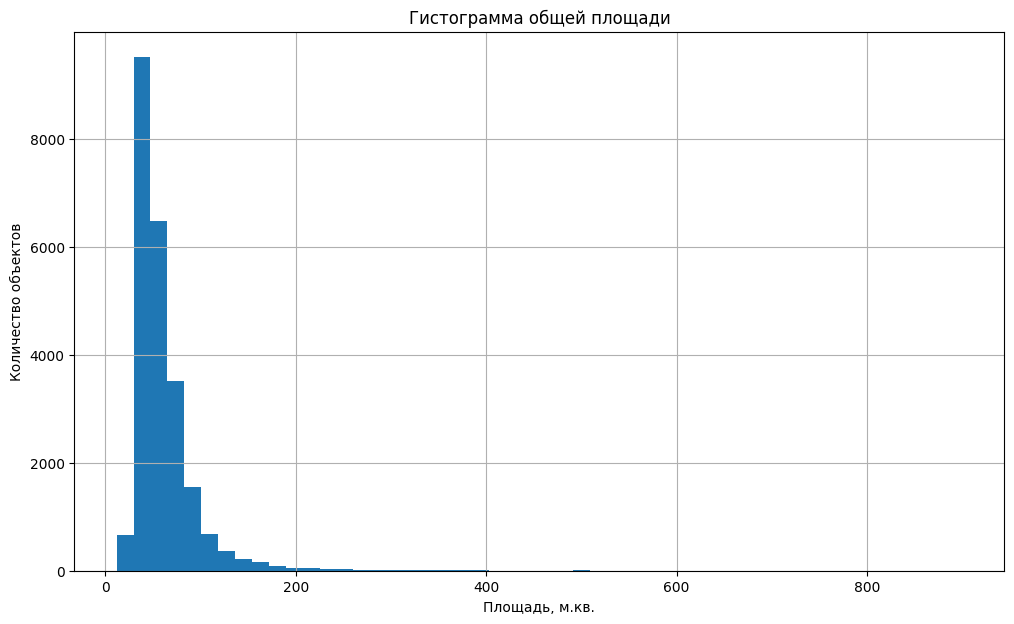

In [47]:
data['total_area'].hist(bins=50, figsize=(12,7))
plt.title('Гистограмма общей площади')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Изучим квартиры с минимальной и максимальной площадью.

In [48]:
data.sort_values(by='total_area').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
19904,4,2400000,12.00,2017-07-19,1,2.55,5,10.00,2,False,False,False,NaN,0,Санкт-Петербург,21314,964,1,886.0,2.0,45,200,False,Санкт-Петербург,Санкт-Петербург,200000.000000,2,7,2017,другой,1.0
19546,3,1850000,13.00,2019-03-11,1,3.40,5,NaN,2,False,False,False,NaN,0,Санкт-Петербург,24915,5483,1,644.0,0.0,<NA>,24,False,Санкт-Петербург,Санкт-Петербург,142307.692308,0,3,2019,другой,5.0
19807,0,3800000,13.00,2018-07-04,1,NaN,5,10.00,3,False,False,False,NaN,0,Санкт-Петербург,21302,1242,1,592.0,3.0,27,9,False,Санкт-Петербург,Санкт-Петербург,292307.692308,2,7,2018,другой,1.0
17961,3,1400000,13.00,2017-12-03,1,2.60,9,NaN,1,False,False,False,NaN,0,Санкт-Петербург,14350,15945,0,NaN,1.0,185,410,False,Санкт-Петербург,Санкт-Петербург,107692.307692,6,12,2017,первый,16.0
19558,2,1686000,13.20,2018-12-17,1,NaN,5,NaN,1,False,False,False,NaN,0,Санкт-Петербург,19891,4165,1,361.0,1.0,155,19,False,Санкт-Петербург,Санкт-Петербург,127727.272727,0,12,2018,первый,4.0
19642,5,1190000,14.00,2018-07-29,1,NaN,5,11.00,1,False,False,False,2.0,0,Санкт-Петербург,9898,11122,0,NaN,0.0,<NA>,4,False,Санкт-Петербург,Санкт-Петербург,85000.000000,6,7,2018,первый,11.0
12040,5,1900000,15.00,2018-06-27,1,2.50,5,NaN,1,False,False,False,NaN,0,Сосновый Бор,<NA>,<NA>,<NA>,NaN,NaN,<NA>,45,False,Сосновый Бор,Сосновый Бор,126666.666667,2,6,2018,первый,<NA>
16949,9,1550000,15.00,2018-08-21,1,2.70,9,NaN,1,False,False,False,NaN,0,Санкт-Петербург,51048,16376,0,NaN,1.0,1079,42,False,Санкт-Петербург,Санкт-Петербург,103333.333333,1,8,2018,первый,16.0
8886,10,2450000,15.50,2018-08-22,0,NaN,5,10.00,2,False,True,False,NaN,0,Санкт-Петербург,24326,4589,0,NaN,1.0,446,27,False,Санкт-Петербург,Санкт-Петербург,158064.516129,2,8,2018,другой,5.0
9412,5,2100000,16.00,2017-12-10,0,NaN,6,13.00,1,False,False,True,NaN,0,Санкт-Петербург,20735,2111,2,228.0,3.0,72,3,False,Санкт-Петербург,Санкт-Петербург,131250.000000,6,12,2017,первый,2.0


In [49]:
data.sort_values(by='total_area', ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
19540,8,420000000,900.00,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.00,0,Санкт-Петербург,30706,7877,0,NaN,2.0,318,106,False,Санкт-Петербург,Санкт-Петербург,4.666667e+05,2,12,2017,последний,8.0
12859,20,140000000,631.20,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.50,1,Санкт-Петербург,25707,4972,0,NaN,2.0,210,<NA>,False,Санкт-Петербург,Санкт-Петербург,2.217997e+05,1,4,2019,последний,5.0
3117,19,140000000,631.00,2019-03-30,7,NaN,5,NaN,5,False,False,False,60.00,0,Санкт-Петербург,25707,4972,0,NaN,2.0,210,<NA>,False,Санкт-Петербург,Санкт-Петербург,2.218700e+05,5,3,2019,последний,5.0
15651,20,300000000,618.00,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.00,0,Санкт-Петербург,32440,5297,0,NaN,2.0,198,111,False,Санкт-Петербург,Санкт-Петербург,4.854369e+05,0,12,2017,другой,5.0
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.00,0,Санкт-Петербург,24447,4666,1,767.0,0.0,<NA>,14,False,Санкт-Петербург,Санкт-Петербург,1.101695e+05,3,2,2019,другой,5.0
4237,1,50000000,517.00,2017-10-14,7,NaN,4,332.0,3,False,False,False,22.00,0,Санкт-Петербург,22835,1847,2,477.0,2.0,540,<NA>,False,Санкт-Петербург,Санкт-Петербург,9.671180e+04,5,10,2017,другой,2.0
8018,20,84000000,507.00,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.50,1,Санкт-Петербург,<NA>,5735,2,110.0,0.0,<NA>,1078,False,Санкт-Петербург,Санкт-Петербург,1.656805e+05,3,12,2015,последний,6.0
15016,8,150000000,500.00,2016-01-13,4,3.20,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058,6150,3,209.0,3.0,531,303,False,Санкт-Петербург,Санкт-Петербург,3.000000e+05,2,1,2016,последний,6.0
5893,3,230000000,500.00,2017-05-31,6,NaN,7,NaN,7,False,False,False,40.00,0,Санкт-Петербург,32440,5297,0,NaN,2.0,198,50,False,Санкт-Петербург,Санкт-Петербург,4.600000e+05,2,5,2017,последний,5.0
12401,20,91500000,495.00,2017-06-19,7,4.65,7,347.5,7,False,False,False,25.00,0,Санкт-Петербург,<NA>,5735,2,110.0,0.0,<NA>,14,False,Санкт-Петербург,Санкт-Петербург,1.848485e+05,0,6,2017,последний,6.0


Распределение данных в столбце соответствует распределению Пуассона. Объекты с минимальной и максимальной площадью по другим параметрам (например стоимость и количество комнат) выглядят как ошибка. 

Медианная площадь объектов недвижимости составляет 52 м.кв.

Средняя площадь 60.3 м.кв.

**Изучим параметр "жилая площадь"**

Посмотрим на сводную статистику и гистограмму для столбца "living_area"

In [50]:
data['living_area'].describe()

count    21636.000000
mean        34.436493
std         22.060014
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь 2 м.кв. выглядит как ошибка. Изучим квартиры с минимальной жилой площадью.

In [51]:
data.sort_values(by='living_area').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
21758,0,2330000,23.00,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,посёлок Мурино,<NA>,<NA>,<NA>,NaN,NaN,<NA>,66,False,Мурино,Мурино,101304.347826,0,1,2018,другой,<NA>
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453,6521,0,NaN,1.0,1012,91,False,Санкт-Петербург,Санкт-Петербург,122115.384615,1,2,2018,другой,7.0
23574,14,64990000,139.00,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255,5975,1,630.0,3.0,100,280,False,Санкт-Петербург,Санкт-Петербург,467553.956835,1,11,2015,последний,6.0
3242,7,4440000,41.00,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272,13073,0,NaN,0.0,<NA>,216,False,Санкт-Петербург,Санкт-Петербург,108292.682927,6,7,2017,последний,13.0
17582,11,2680000,22.00,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735,11618,1,835.0,1.0,652,70,False,Санкт-Петербург,Санкт-Петербург,121818.181818,5,8,2018,другой,12.0
21943,15,6100000,77.60,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338,11270,1,584.0,0.0,<NA>,33,False,Санкт-Петербург,Санкт-Петербург,78608.247423,3,2,2019,первый,11.0
16431,13,3799000,31.00,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177,4826,1,430.0,0.0,<NA>,168,False,Санкт-Петербург,Санкт-Петербург,122548.387097,3,4,2018,первый,5.0
19251,19,4050000,33.00,2018-10-15,1,2.50,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258,10592,1,458.0,0.0,<NA>,44,False,Санкт-Петербург,Санкт-Петербург,122727.272727,0,10,2018,другой,11.0
20994,7,8900000,50.60,2018-10-22,2,2.50,7,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771,8301,1,173.0,3.0,126,<NA>,False,Санкт-Петербург,Санкт-Петербург,175889.328063,0,10,2018,другой,8.0
23208,12,4800000,37.00,2016-02-24,1,NaN,14,8.0,11,False,False,False,22.0,0,Санкт-Петербург,27838,12387,2,358.0,1.0,950,139,False,Санкт-Петербург,Санкт-Петербург,129729.729730,2,2,2016,другой,12.0


Маленькая жилая площадь у квартир с малой общей площадью выглядит логично. Удалим только строки с жилой площадью менее 5 м.кв., потому что такая жилая площадь звучит совсем неправдоподобно.

In [52]:
data = data[data['living_area'] >= 5.00]
data.sort_values(by='living_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
17582,11,2680000,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735,11618,1,835.0,1.0,652,70,False,Санкт-Петербург,Санкт-Петербург,121818.181818,5,8,2018,другой,12.0
21943,15,6100000,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338,11270,1,584.0,0.0,<NA>,33,False,Санкт-Петербург,Санкт-Петербург,78608.247423,3,2,2019,первый,11.0
16431,13,3799000,31.0,2018-04-12,1,2.6,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177,4826,1,430.0,0.0,<NA>,168,False,Санкт-Петербург,Санкт-Петербург,122548.387097,3,4,2018,первый,5.0
19251,19,4050000,33.0,2018-10-15,1,2.5,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258,10592,1,458.0,0.0,<NA>,44,False,Санкт-Петербург,Санкт-Петербург,122727.272727,0,10,2018,другой,11.0
20994,7,8900000,50.6,2018-10-22,2,2.5,7,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771,8301,1,173.0,3.0,126,<NA>,False,Санкт-Петербург,Санкт-Петербург,175889.328063,0,10,2018,другой,8.0


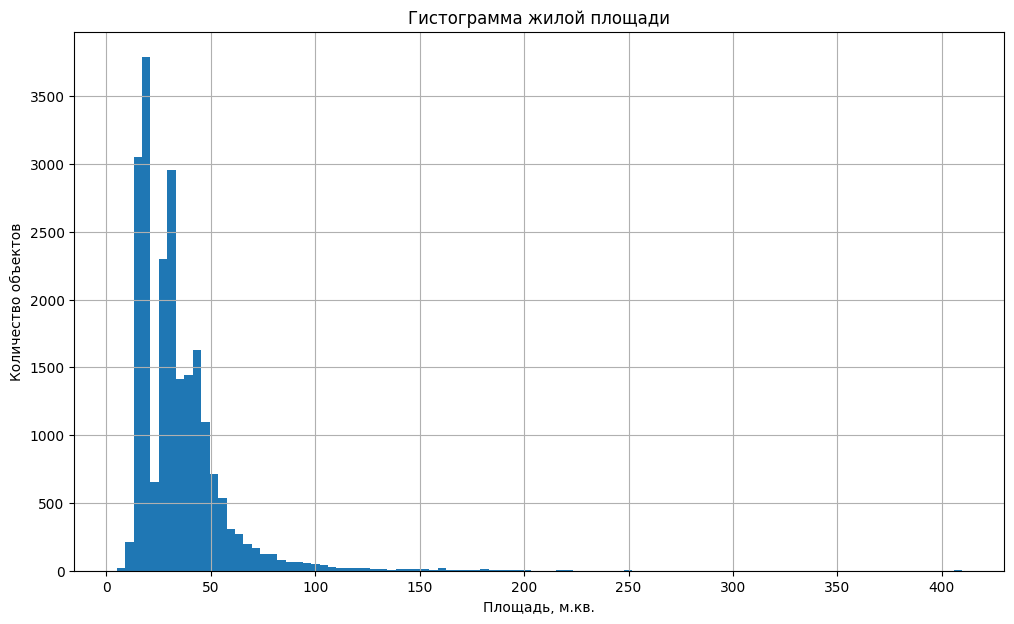

In [53]:
data['living_area'].hist(bins=100, figsize=(12,7))
plt.title('Гистограмма жилой площади')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

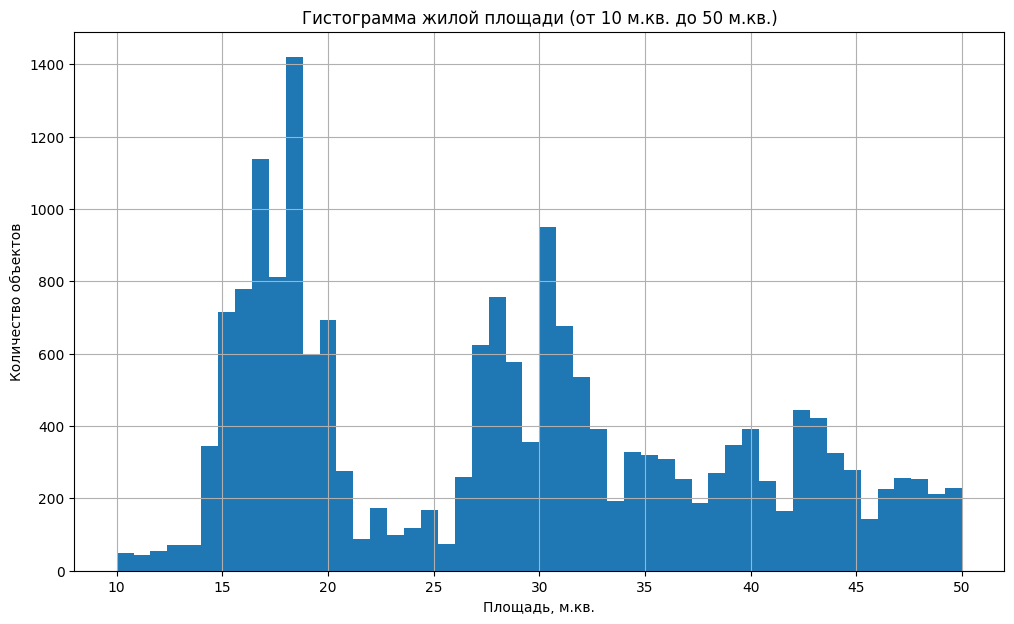

In [54]:
data['living_area'].hist(bins=50, range=(10, 50), figsize=(12,7))
plt.title('Гистограмма жилой площади (от 10 м.кв. до 50 м.кв.)')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Имеются локальные максимумы на значениях 17, 30 и 43 м.кв. 

Посмотрим как жилая площадь связана с количеством комнат.

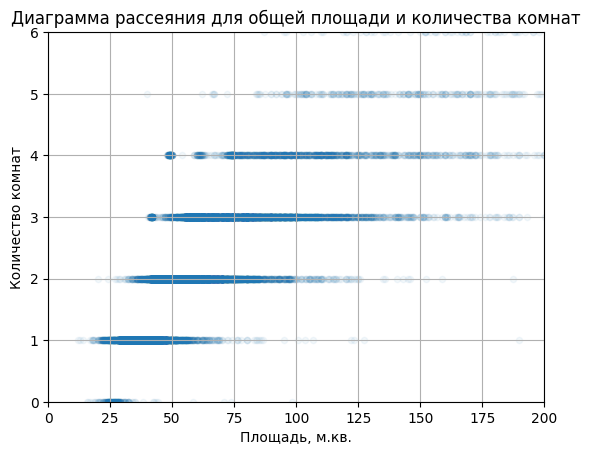

In [55]:
data.plot(x='total_area', y='rooms', kind='scatter', grid=True, alpha=0.05) 

plt.xlim(0, 200)
plt.ylim(0, 6)
plt.title('Диаграмма рассеяния для общей площади и количества комнат')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Количество комнат')
plt.grid(True)

plt.show()

In [56]:
data[(data['living_area'] >= (17-5)) & (data['living_area'] < (17+5))]['rooms'].describe()

count    7049.000000
mean        0.998581
std         0.213740
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: rooms, dtype: float64

In [57]:
data[(data['living_area'] >= (30-5)) & (data['living_area'] < (30+5))]['rooms'].describe()

count    5882.000000
mean        2.008671
std         0.287043
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: rooms, dtype: float64

In [58]:
data[(data['living_area'] >= (43-5)) & (data['living_area'] < (43+5))]['rooms'].describe()

count    3574.000000
mean        2.829882
std         0.450322
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

При увеличении количества комнат жилая площадь увеличивается. 
Наиболее частые жилые площади для однокомнатных, двукомнатных и трехкомнатных квартир находятся возле значений 17, 30 и 43 м.кв. соответственно.

Посмотрим как связаны общая и жилая площади.

In [59]:
data['total_area'].corr(data['living_area'])

np.float64(0.94069328704302)

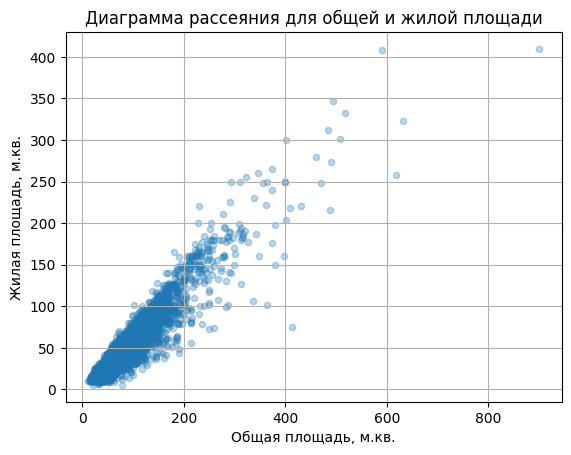

In [60]:
data.plot(x='total_area', y='living_area', kind='scatter', grid=True, alpha=0.3) 
plt.title('Диаграмма рассеяния для общей и жилой площади')
plt.xlabel('Общая площадь, м.кв.')
plt.ylabel('Жилая площадь, м.кв.')
plt.grid(True)

plt.show()

Можно сделать вывод о высокой положительной линейной зависимости между жилой и общей площадью.

**Изучим параметр "площадь кухни"**

Посмотрим на сводную статистику и гистограмму для столбца "kitchen_area"

In [61]:
data['kitchen_area'].describe()

count    20838.000000
mean        10.496726
std          5.828795
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

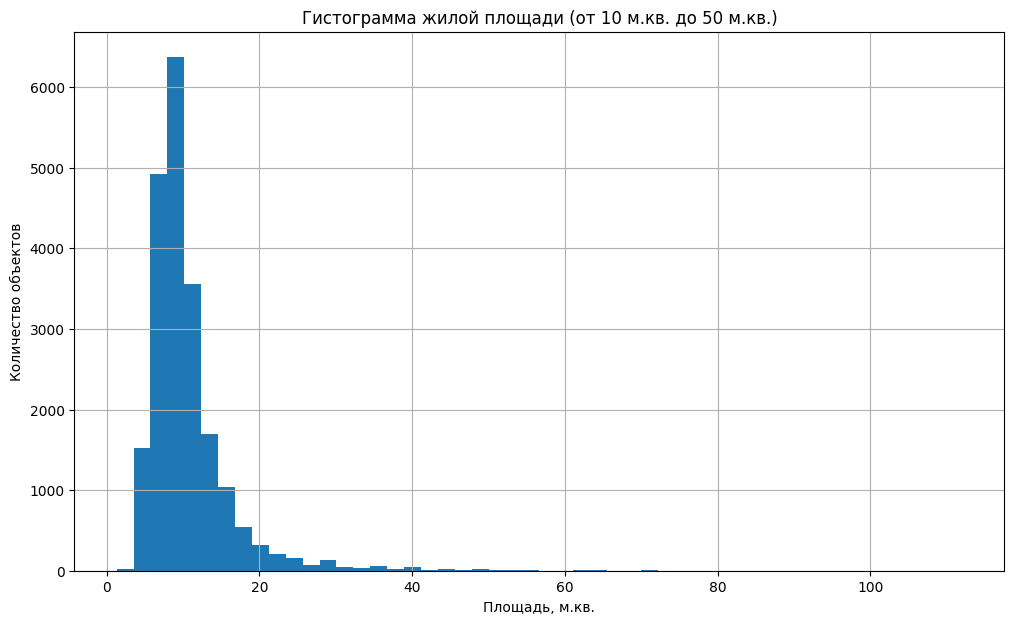

In [62]:
data['kitchen_area'].hist(bins=50, figsize=(12,7))
plt.title('Гистограмма жилой площади (от 10 м.кв. до 50 м.кв.)')
plt.xlabel('Площадь, м.кв.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

In [63]:
data['total_area'].corr(data['kitchen_area'])

np.float64(0.6117508492872386)

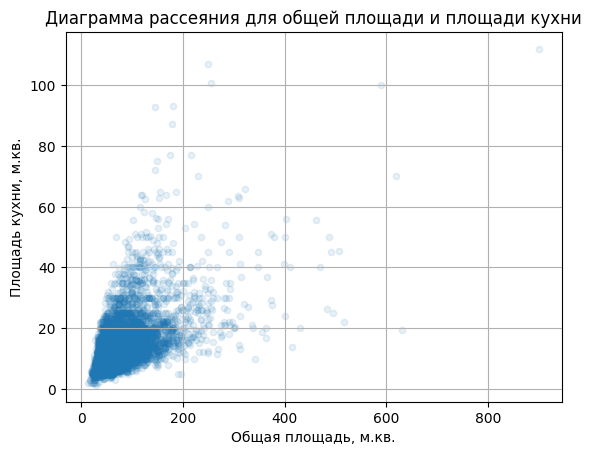

In [64]:
data.plot(x='total_area', y='kitchen_area', kind='scatter', grid=True, alpha=0.11) 
plt.title('Диаграмма рассеяния для общей площади и площади кухни')
plt.xlabel('Общая площадь, м.кв.')
plt.ylabel('Площадь кухни, м.кв.')
plt.grid(True)

plt.show()

Имеется средняя линейная зависимость между общей площадью и площадью кухни. 

Медианная площадь кухни составляет 9 м.кв. 

Межквартильный размах от 7 до 12 м.кв.

**Изучим параметр "количество комнат"**

Посмотрим на сводную статистику и гистограмму для столбца "rooms"

In [65]:
data['rooms'].describe()

count    21632.000000
mean         2.072809
std          1.081196
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

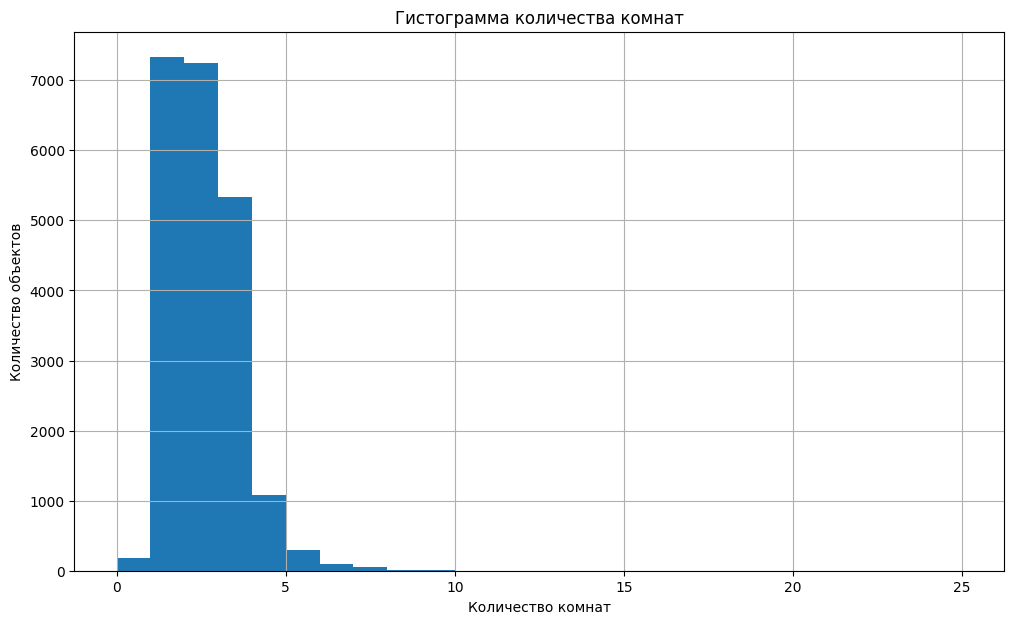

In [66]:
data['rooms'].hist(bins=25, range=(0,25), figsize=(12,7))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

In [67]:
data['rooms'][data['rooms'].isin([1, 2, 3])].count() / data['rooms'].count()

np.float64(0.9197022928994083)

92% квартир имеют 1, 2 или 3 комнаты.

В среднем в квартирах 2 комнаты. 

Посмотрим на квартиры с большим количеством комнат.

In [68]:
data.sort_values(by='rooms', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
14498,6,32250000,374.6,2018-06-09,19,NaN,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497,3574,0,NaN,2.0,548,114,False,Санкт-Петербург,Санкт-Петербург,86091.831287,5,6,2018,другой,4.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575,4142,1,516.0,0.0,<NA>,1365,False,Санкт-Петербург,Санкт-Петербург,105555.555556,0,3,2015,последний,4.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447,4666,1,767.0,0.0,<NA>,14,False,Санкт-Петербург,Санкт-Петербург,110169.491525,3,2,2019,другой,5.0
20829,6,28659000,245.4,2016-03-31,14,NaN,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104,2054,3,541.0,2.0,118,95,False,Санкт-Петербург,Санкт-Петербург,116784.841076,3,3,2016,другой,2.0
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076,7950,0,NaN,2.0,435,418,False,Санкт-Петербург,Санкт-Петербург,68870.523416,5,12,2017,другой,8.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,NaN,2.0,318,106,False,Санкт-Петербург,Санкт-Петербург,466666.666667,2,12,2017,последний,8.0
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606,3148,0,NaN,0.0,<NA>,<NA>,False,Санкт-Петербург,Санкт-Петербург,95264.017420,6,7,2018,последний,3.0
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469,1015,1,686.0,2.0,66,813,False,Санкт-Петербург,Санкт-Петербург,170015.455951,1,2,2017,другой,1.0
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726,12169,1,191.0,1.0,531,<NA>,False,Санкт-Петербург,Санкт-Петербург,84372.707263,3,1,2018,последний,12.0
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229,4932,3,316.0,1.0,227,77,False,Санкт-Петербург,Санкт-Петербург,137931.034483,1,6,2016,последний,5.0


Такие квартиры продаются в Санкт-Петербурге недалеко от центра и имеют большую площадь. Возможно это бывшие коммунальные квартиры.

Изучим квартиры с количеством комнат равным нулю.

In [69]:
data.sort_values(by='rooms').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
23637,8,2350000,26.00,2018-06-26,0,NaN,25,17.00,4,False,True,False,NaN,2,посёлок Бугры,<NA>,<NA>,<NA>,NaN,NaN,<NA>,207,False,Бугры,Бугры,90384.615385,1,6,2018,другой,<NA>
8271,11,2300000,21.30,2018-03-16,0,NaN,22,18.00,1,False,True,False,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,NaN,NaN,<NA>,56,False,Мурино,Мурино,107981.220657,4,3,2018,первый,<NA>
8408,7,1599000,27.00,2019-03-19,0,NaN,3,19.00,2,False,True,False,NaN,0,Всеволожск,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,Всеволожск,Всеволожск,59222.222222,1,3,2019,другой,<NA>
8718,10,4000000,26.00,2018-02-27,0,2.80,16,22.00,7,False,True,False,NaN,2,Санкт-Петербург,10796,14361,0,NaN,0.0,<NA>,50,False,Санкт-Петербург,Санкт-Петербург,153846.153846,1,2,2018,другой,14.0
8721,9,3200000,26.00,2018-07-16,0,NaN,19,14.00,17,False,True,False,NaN,1,посёлок Шушары,11858,17411,0,NaN,0.0,<NA>,266,False,Шушары,Шушары,123076.923077,0,7,2018,другой,17.0
8776,8,2450000,25.00,2018-01-09,0,NaN,25,18.00,24,False,True,False,NaN,2,деревня Кудрово,<NA>,<NA>,<NA>,NaN,NaN,<NA>,50,False,Кудрово,Кудрово,98000.000000,1,1,2018,другой,<NA>
8755,1,1350000,18.80,2017-11-22,0,2.75,19,15.80,1,False,True,False,NaN,0,Санкт-Петербург,37636,14479,0,NaN,1.0,1127,128,False,Санкт-Петербург,Санкт-Петербург,71808.510638,2,11,2017,первый,14.0
8886,10,2450000,15.50,2018-08-22,0,NaN,5,10.00,2,False,True,False,NaN,0,Санкт-Петербург,24326,4589,0,NaN,1.0,446,27,False,Санкт-Петербург,Санкт-Петербург,158064.516129,2,8,2018,другой,5.0
9052,12,3890000,38.30,2017-10-06,0,2.70,14,24.42,7,False,True,False,NaN,2,Санкт-Петербург,15493,14289,0,NaN,0.0,<NA>,289,False,Санкт-Петербург,Санкт-Петербург,101566.579634,4,10,2017,другой,14.0
7625,5,3450000,25.00,2019-03-05,0,NaN,19,18.00,14,False,True,False,NaN,2,Санкт-Петербург,18490,17492,0,NaN,2.0,113,<NA>,False,Санкт-Петербург,Санкт-Петербург,138000.000000,1,3,2019,другой,17.0


In [70]:
len(data[data['rooms'] == 0])

182

In [71]:
len(data[(data['rooms'] == 0) & ((data['studio'] == True) | (data['open_plan'] == True))])

182

In [72]:
data[data['rooms'] == 0]['total_area'].mean()

np.float64(27.668186813186818)

Всего в таблице 182 квартиры с нулевым количеством комнат. Средняя площадь таких квартир 27,7 метра квадратных. Владельцы маленьких квартир студий и квартир со свободной планировкой указывают количество комнат равное нулю.

**Изучим параметр "высота потолков"**

Посмотрим на сводную статистику и гистограмму для столбца "ceiling_height"

In [73]:
data['ceiling_height'].describe()

count    13643.000000
mean         2.769469
std          1.263454
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В таблице имеется квартира с высотой потолка 1 метр. Изучим квартиры с низкими потолками.

In [74]:
data.sort_values(by='ceiling_height').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
22590,16,6000000,55.00,2018-10-31,2,1.00,12,32.400000,7,False,False,False,10.00,0,Санкт-Петербург,33053,14217,2,293.0,2.0,289,13,False,Санкт-Петербург,Санкт-Петербург,109090.909091,2,10,2018,другой,14.0
5712,5,1500000,42.80,2017-08-14,2,1.20,2,27.500000,1,False,False,False,5.20,0,городской посёлок Мга,<NA>,<NA>,<NA>,NaN,NaN,<NA>,248,False,Мга,Мга,35046.728972,0,8,2017,первый,<NA>
16934,5,4100000,40.00,2017-10-17,1,1.75,37,17.400000,5,False,False,False,8.34,0,Санкт-Петербург,18732,20444,0,NaN,3.0,80,71,False,Санкт-Петербург,Санкт-Петербург,102500.000000,1,10,2017,другой,20.0
11352,4,3300000,36.00,2017-06-18,1,2.00,17,15.200000,12,False,False,False,10.10,0,посёлок Металлострой,25268,26980,0,NaN,0.0,<NA>,53,False,Металлострой,Металлострой,91666.666667,6,6,2017,другой,27.0
4212,1,2120000,35.43,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.80,2,Тосно,<NA>,<NA>,<NA>,NaN,NaN,<NA>,36,False,Тосно,Тосно,59836.296924,0,12,2017,другой,<NA>
19098,7,2700000,56.00,2018-02-04,3,2.00,5,46.000000,1,False,False,False,6.00,0,Выборг,<NA>,<NA>,<NA>,NaN,NaN,<NA>,282,False,Выборг,Выборг,48214.285714,6,2,2018,первый,<NA>
16446,6,12300000,88.30,2019-03-12,3,2.00,5,63.900000,2,False,False,False,12.00,0,Санкт-Петербург,38415,7675,1,568.0,1.0,154,<NA>,False,Санкт-Петербург,Санкт-Петербург,139297.848245,1,3,2019,другой,8.0
16884,0,1500000,33.00,2018-10-03,1,2.00,5,20.000000,5,False,False,False,6.00,0,Выборг,<NA>,<NA>,<NA>,NaN,NaN,<NA>,6,False,Выборг,Выборг,45454.545455,2,10,2018,последний,<NA>
2572,4,2400000,62.00,2018-12-27,3,2.00,5,40.000000,4,False,False,False,6.00,1,Луга,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,Луга,Луга,38709.677419,3,12,2018,другой,<NA>
22960,17,2300000,53.60,2018-10-18,2,2.00,2,19.000000,1,False,False,False,10.00,0,Всеволожск,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,Всеволожск,Всеволожск,42910.447761,3,10,2018,первый,<NA>


Квартиры с высотой потолка 2 метра и ниже выглядят не правдоподобно. Предлагается такие квартиры удалить.

In [75]:
data = data[data['ceiling_height'] > 2.00]
data.sort_values(by='ceiling_height').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
12755,2,1400000,22.5,2017-09-21,1,2.20,2,18.000000,2,False,False,False,4.5,1,село Копорье,<NA>,<NA>,<NA>,NaN,NaN,<NA>,45,False,Копорье,Копорье,62222.222222,3,9,2017,последний,<NA>
17794,1,2300000,58.6,2016-05-12,3,2.25,5,44.100002,3,False,False,False,5.5,1,деревня Бегуницы,<NA>,<NA>,<NA>,NaN,NaN,<NA>,45,False,Бегуницы,Бегуницы,39249.146758,3,5,2016,другой,<NA>
23498,7,1600000,54.0,2016-12-26,2,2.30,1,33.000000,1,False,False,False,3.5,0,Высоцк,<NA>,<NA>,<NA>,NaN,NaN,<NA>,281,False,Высоцк,Высоцк,29629.629630,0,12,2016,первый,<NA>
5498,17,2200000,56.0,2018-04-02,2,2.30,5,45.000000,1,False,False,False,9.0,2,Сясьстрой,<NA>,<NA>,<NA>,NaN,NaN,<NA>,55,False,Сясьстрой,Сясьстрой,39285.714286,0,4,2018,первый,<NA>
1582,4,4100000,45.6,2016-01-13,2,2.30,9,28.400000,8,False,False,False,7.0,2,Санкт-Петербург,49152,14977,1,489.0,1.0,525,329,False,Санкт-Петербург,Санкт-Петербург,89912.280702,2,1,2016,другой,15.0


В таблице встречаются квартиры с высотой потолка до 100 метров. Изучим квартиры с высокими потолками.

In [76]:
data.sort_values(by='ceiling_height', ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223.0,3.0,30,19,False,Санкт-Петербург,Санкт-Петербург,600000.000000,2,7,2018,последний,8.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,Волхов,Волхов,38666.666667,0,11,2018,другой,<NA>
22336,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838,3506,0,NaN,3.0,511,<NA>,False,Санкт-Петербург,Санкт-Петербург,108214.285714,4,4,2019,другой,4.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,<NA>,<NA>,<NA>,NaN,NaN,<NA>,540,False,Мины,Мины,46296.296296,4,10,2017,другой,<NA>
17857,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,NaN,0,Санкт-Петербург,41030,15543,0,NaN,0.0,<NA>,73,False,Санкт-Петербург,Санкт-Петербург,69642.857143,4,12,2017,другой,16.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,False,False,9.0,1,деревня Нижняя,<NA>,<NA>,<NA>,NaN,NaN,<NA>,27,False,Нижняя,Нижняя,40816.326531,3,3,2018,последний,<NA>
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732,20444,0,NaN,3.0,80,38,False,Санкт-Петербург,Санкт-Петербург,101875.000000,2,1,2019,другой,20.0
10773,8,3800000,58.0,2017-10-13,2,27.0,10,30.1,3,False,False,False,8.1,2,посёлок Мурино,<NA>,<NA>,<NA>,NaN,NaN,<NA>,71,False,Мурино,Мурино,65517.241379,4,10,2017,другой,<NA>
20478,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,False,False,10.0,1,Санкт-Петербург,18975,3246,0,NaN,3.0,449,429,False,Санкт-Петербург,Санкт-Петербург,177777.777778,1,7,2017,другой,3.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,NaN,NaN,<NA>,28,False,Мурино,Мурино,120000.000000,2,9,2017,другой,<NA>


Высота потолков в квартирах со вторым светом действительно может достигать 6 метров. В таблице имеются квартиры с высотой потолков 8 метров и более. Такие квартиры предлагается удалить.

In [77]:
data = data[data['ceiling_height'] <= 6.00]
data.sort_values(by='ceiling_height', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
20264,17,119000000,187.6,2017-07-10,4,6.0,7,147.0,7,False,False,False,15.6,0,Санкт-Петербург,26902,5605,3,484.0,1.0,305,259,False,Санкт-Петербург,Санкт-Петербург,634328.358209,0,7,2017,последний,6.0
21227,0,8200000,71.0,2017-07-21,0,5.8,5,68.0,5,False,True,False,NaN,0,Санкт-Петербург,20170,1261,2,295.0,3.0,366,30,False,Санкт-Петербург,Санкт-Петербург,115492.957746,4,7,2017,последний,1.0
7578,17,38000000,143.0,2017-11-02,3,5.5,5,83.0,5,False,False,False,29.0,1,Санкт-Петербург,26333,6448,3,479.0,0.0,<NA>,<NA>,False,Санкт-Петербург,Санкт-Петербург,265734.265734,3,11,2017,последний,6.0
1026,20,155000000,310.0,2018-10-12,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899,4785,0,NaN,1.0,603,<NA>,False,Санкт-Петербург,Санкт-Петербург,500000.000000,4,10,2018,последний,5.0
464,15,66571000,280.3,2015-06-11,6,5.2,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316,6655,3,187.0,1.0,616,578,False,Санкт-Петербург,Санкт-Петербург,237499.108098,3,6,2015,другой,7.0


Еще раз посмотрим на сводную статистику.

In [78]:
data['ceiling_height'].describe()

count    13604.000000
mean         2.726016
std          0.275360
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

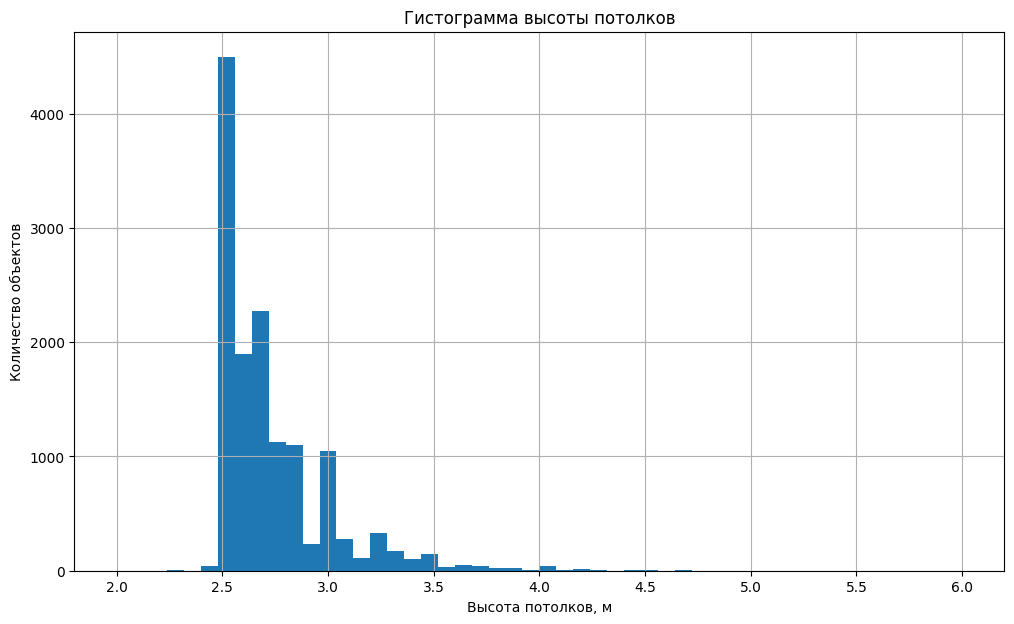

In [79]:
data['ceiling_height'].hist(bins=50, range=(2,6), figsize=(12,7))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Медианная высота квартиры 2.65 м. Средняя - 2.73 м.

50% средних квартир между первым и третьим квартилем имеют высоту потолков от 2.52 м. до 2,8 м. За пределами данного диапазона еще имеется локальный пик возле отметки 3,0 м.

**Изучим параметр "тип этажа квартиры"**

Посмотрим на гистограмму для столбца "floor_type"

In [80]:
data['floor_type'].describe()

count      13604
unique         3
top       другой
freq        9947
Name: floor_type, dtype: object

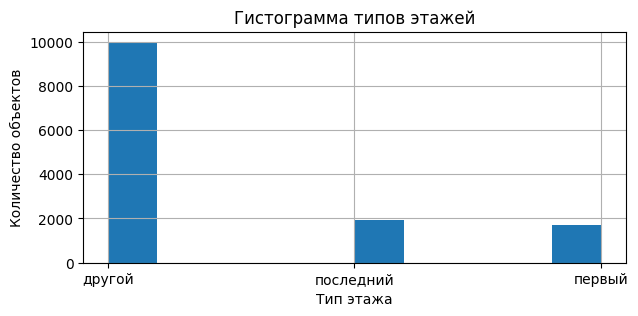

In [81]:
data['floor_type'].hist(figsize=(7,3))
plt.title('Гистограмма типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Для многоэтажных домов посмотрим на каких этажах чаще продают квартиры.

Посчитаем количесто объявлений на первом, последнем и среднее значение на других этажах.

In [82]:
first_floor = data['floor_type'][(data['floors_total'] != 1) & (data['floor_type'] == 'первый')].count()
first_floor

np.int64(1694)

In [83]:
mid_floor = data['floor_type'][(data['floors_total'] != 1) & (data['floor_type'] == 'другой')].count()
avr_mid_floor = data['floors_total'][data['floors_total'] != 1].mean() - 2 # среднее количество этажей в многоэтажных домах, за исключением первого и последнего этажа
mid_floor = mid_floor / avr_mid_floor
mid_floor

np.float64(1212.7333016465186)

In [84]:
last_floor = data['floor_type'][(data['floors_total'] != 1) & (data['floor_type'] == 'последний')].count()
last_floor

np.int64(1954)

In [85]:
floor_data = {
    'тип этажа': ['первый', 'другой (в среднем)', 'последний'],
    'объявлений': [first_floor, mid_floor, last_floor]
}
floor_df = pd.DataFrame(floor_data)

Построим круговую диаграмму

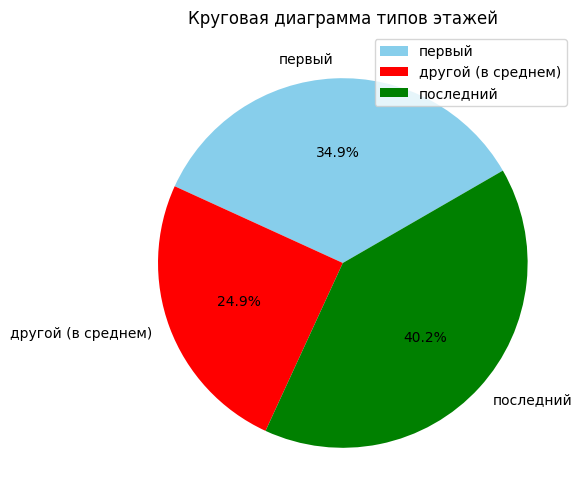

In [86]:
floor_df.set_index('тип этажа').plot(
    kind='pie', 
    y='объявлений', 
    autopct='%.1f%%', 
    startangle=30, 
    colors=['skyblue', 'red', 'green'],
    figsize=(6, 6)
)

plt.title('Круговая диаграмма типов этажей')
plt.ylabel('')  # Удалить ярлык оси Y

plt.show()

На первом и последнем этаже квартиры продают чаще, чем на любом из других этажей.

**Изучим параметр "общее количество этажей в доме"**

Посмотрим на сводную статистику и гистограмму для столбца "floors_total"

In [87]:
data['floors_total'].describe()

count    13604.000000
mean        10.196045
std          6.193231
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

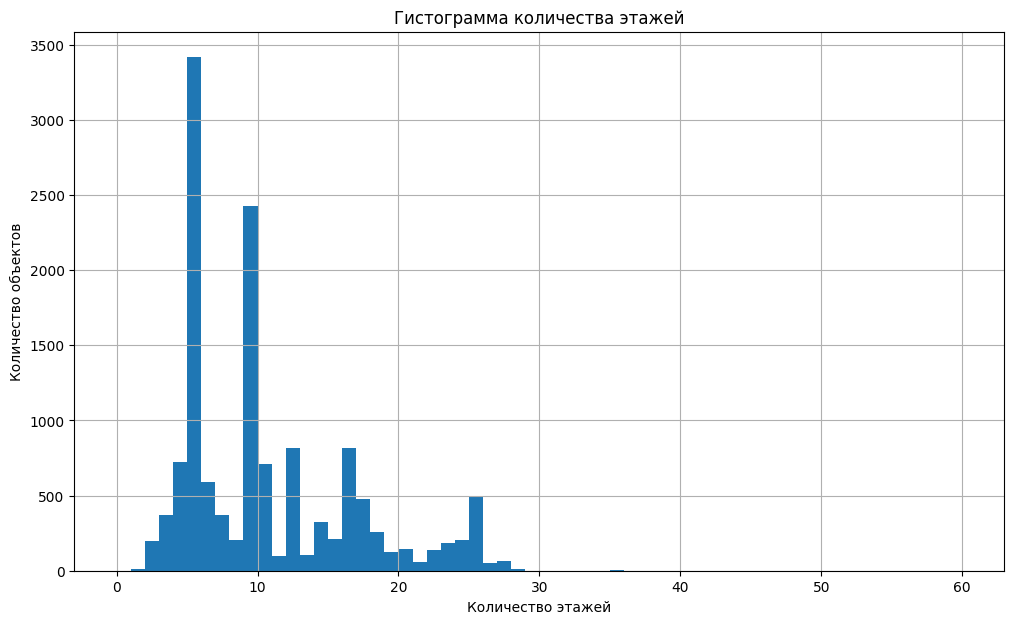

In [88]:
data['floors_total'].hist(bins=60, range=(0,60), figsize=(12,7))
plt.title('Гистограмма количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Посмотрим сколько объектов находятся в одноэтажных зданиях и зданиях высотой более 30 этажей.

In [89]:
data['floors_total'][data['floors_total'] > 30].count()

np.int64(11)

In [90]:
data['floors_total'][data['floors_total'] == 1].count()

np.int64(9)

In [91]:
data['locality_name'][data['floors_total'] == 1]

8335                                Луга
8388                          Сестрорецк
11641                    Санкт-Петербург
14836                   посёлок Стрельна
15543    городской поселок Большая Ижора
17020                   деревня Каськово
21603                    посёлок Сосново
22855                        Зеленогорск
23498                             Высоцк
Name: locality_name, dtype: object

Наиболее часто встречаются квартиры в пятиэтажках и девятиэтажках.

В датасете только 11 объектов находятся в зданиях высотой более 30 этажей.

9 квартир продаются в одноэтажных постройках. 8 из 9 таких объектов продаются не в Санкт-Петербурге.

**Изучим параметр "расстояние до центра города"**

Посмотрим на сводную статистику и гистограмму для столбца "city_centers_nearest"

In [92]:
data['city_centers_nearest'].describe()

count        10906.0
mean     14111.77086
std      8790.196208
min            181.0
25%           9153.5
50%          12990.0
75%          16035.5
max          65968.0
Name: city_centers_nearest, dtype: Float64

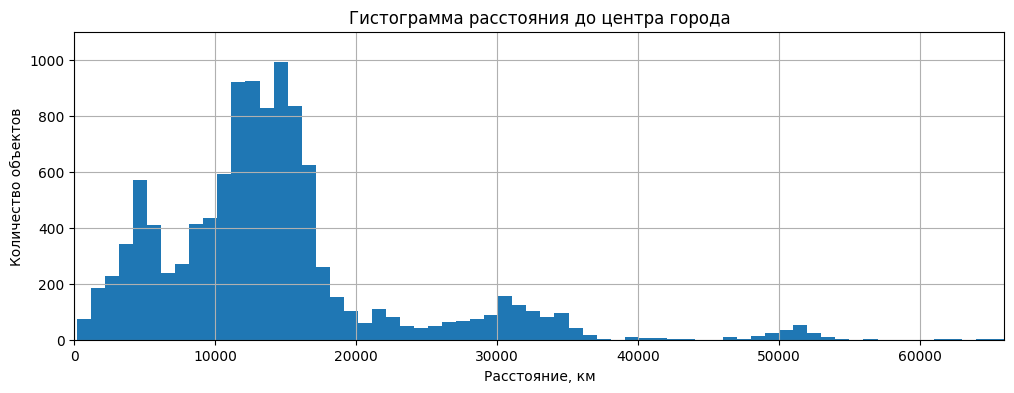

In [93]:
data['city_centers_nearest'].plot(
    kind='hist',
    bins=66,
    grid=True,
    figsize=(12,4)
)
plt.ylim(0, 1100)
plt.xlim(0, 66000)

plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество объектов')

plt.show()

Посмотрим расстояние до центра города для объектов, продающихся не в Санкт-Петербурге.

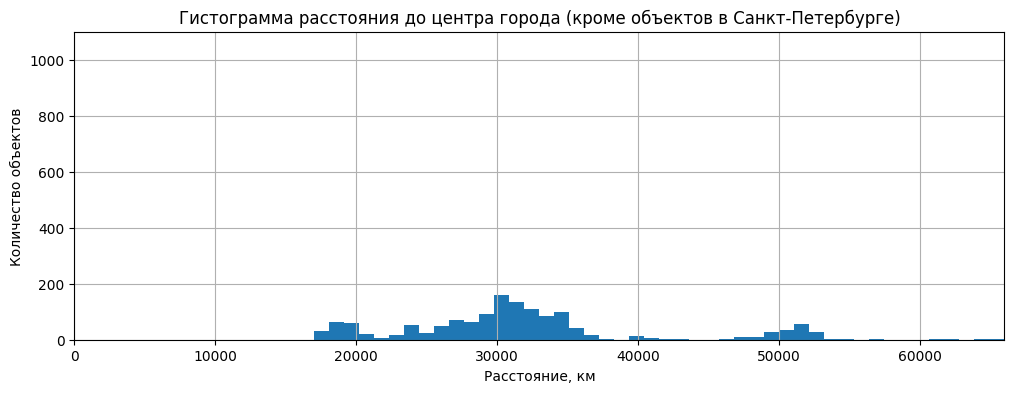

In [94]:
data['city_centers_nearest'][data['normalized_name'] != 'Санкт-Петербург'].plot(
    kind='hist',
    bins=46,
    grid=True,
    figsize=(12,4)
)
plt.ylim(0, 1100)
plt.xlim(0, 66000)

plt.title('Гистограмма расстояния до центра города (кроме объектов в Санкт-Петербурге)')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество объектов')

plt.show()

Вероятно что для объектов, продающихся в других населенных пунктах, сервис автоматически считает расстояние до центра Санкт-Петербурга.

**Изучим параметр "расстояние до ближайшего парка"**

Посмотрим на сводную статистику и гистограмму для столбца "parks_nearest"

In [95]:
data['parks_nearest'].describe()

count    4992.000000
mean      475.783454
std       317.567870
min         3.000000
25%       286.000000
50%       447.500000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

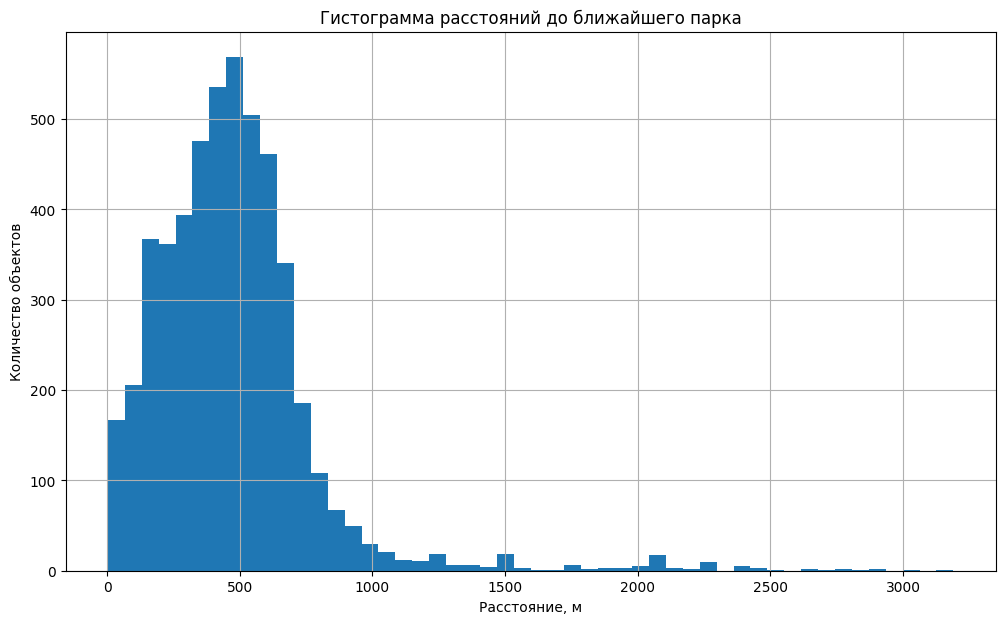

In [96]:
data['parks_nearest'].hist(bins=50, figsize=(12,7))
plt.title('Гистограмма расстояний до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Распределение похоже на распределение Пуассона. Для объектов, у которых указано расстояние до ближайшего парка среднее расстояние 476 мертов. Медианное расстояние 447.5 метров.

**Изучим столбец "сколько дней было размещено объявление"**

Посмотрим на сводную статистику и гистограмму для столбца "days_exposition"

In [97]:
data['days_exposition'].describe()

count       11271.0
mean     192.625055
std      229.374304
min             1.0
25%            45.0
50%           106.0
75%           251.0
max          1580.0
Name: days_exposition, dtype: Float64

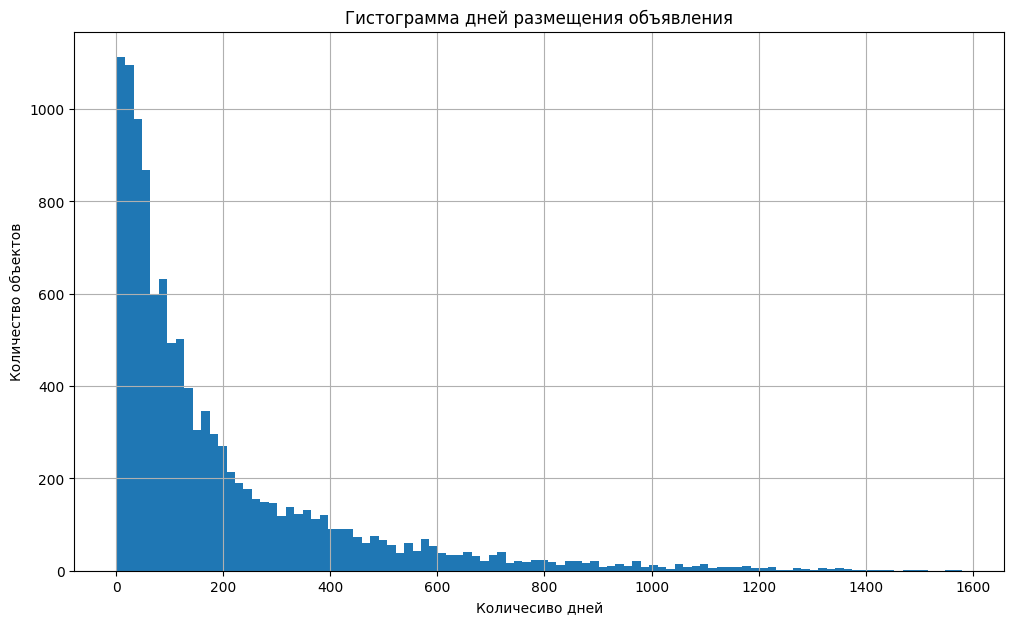

In [98]:
data['days_exposition'].hist(bins=100, figsize=(12,7))
plt.title('Гистограмма дней размещения объявления')
plt.xlabel('Количесиво дней')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Посмотрим диаграмму размаха.

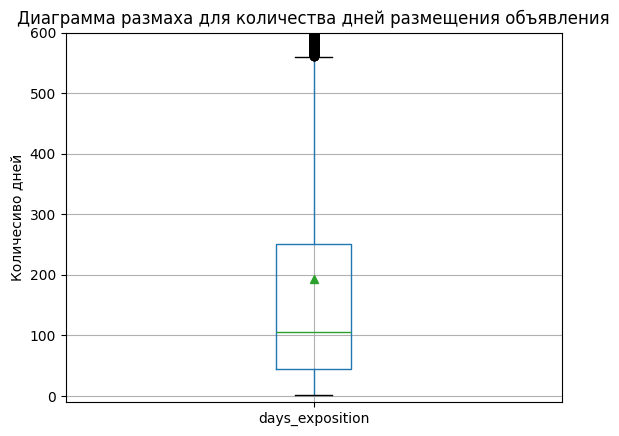

In [99]:
plt.ylim(-10, 600)
data.boxplot(
    column='days_exposition',
    showmeans = True
) 
plt.title('Диаграмма размаха для количества дней размещения объявления')
plt.ylabel('Количесиво дней')
plt.show()

Среднее время продажи объекта недвижимости 193 дня. Медианное значение 106 дней.

Межквартильный размах охватывает значения от 45 до 251 дня. Продажу быстрее 45 дней можно считать быстрой. 

Продажи, которые занимают более 251 дня можно считать долгими.

Продажи, которые занимают более 560 дней (1,5 года) можно условно считать ненормальными.

**Изучим столбец "цена на момент снятия с публикации"**

Посмотрим на сводную статистику и гистограмму для столбца "last_price"

In [100]:
data['last_price'].describe()

count    1.360400e+04
mean     6.791506e+06
std      1.010671e+07
min      1.219000e+04
25%      3.600000e+06
50%      4.869000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

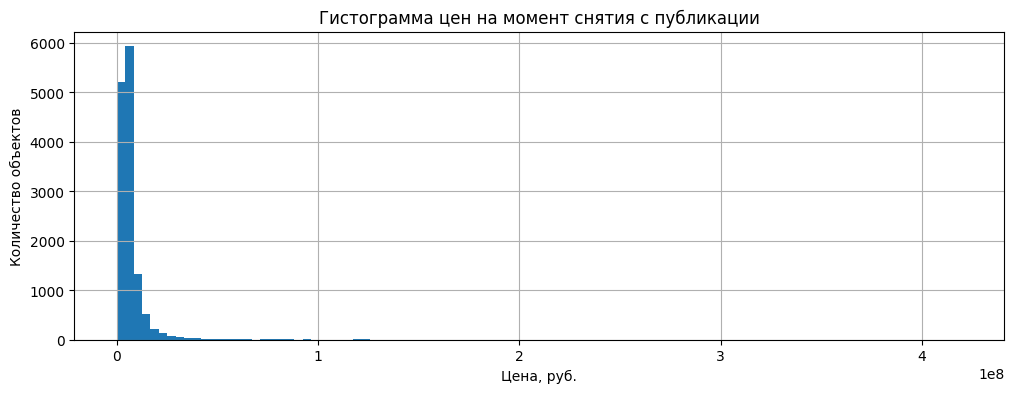

In [101]:
data['last_price'].hist(bins=100, figsize=(12,4))
plt.title('Гистограмма цен на момент снятия с публикации')
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

Из-за объектов со слишком высокой стоимостью данная гистограмма малоинформативна. Посмтотрим внимательнее на объекты до 30 млн.руб.

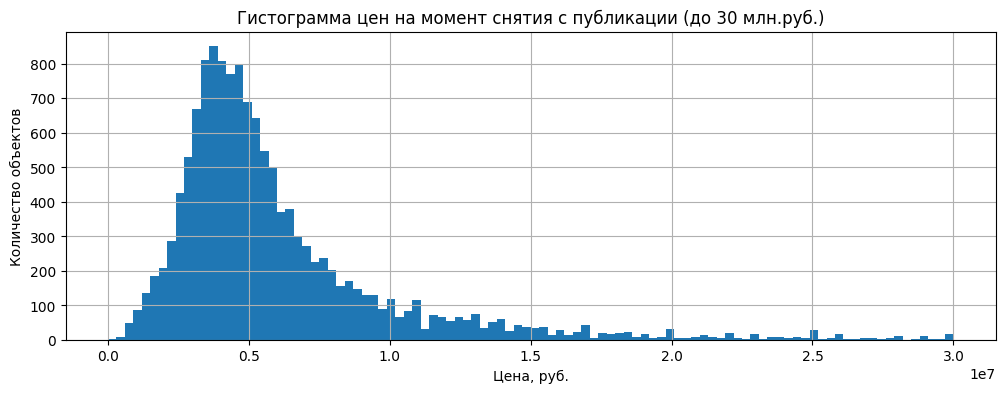

In [102]:
data['last_price'].hist(bins=100, range=(0, 30000000),figsize=(12,4))
plt.title('Гистограмма цен на момент снятия с публикации (до 30 млн.руб.)')
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

В столбце с ценой минимальное значение 12190, что скорее всего ошибка.

In [103]:
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805.0,0.0,<NA>,8,False,Санкт-Петербург,Санкт-Петербург,111.834862,2,3,2019,последний,9.0
10782,3,490000,29.1,2016-05-05,1,2.50,5,17.0,5,False,False,False,5.5,0,Сланцы,<NA>,<NA>,<NA>,NaN,NaN,<NA>,719,False,Сланцы,Сланцы,16838.487973,3,5,2016,последний,<NA>
4405,9,500000,52.0,2018-08-02,2,2.70,2,31.0,1,False,False,False,8.0,0,Сланцы,<NA>,<NA>,<NA>,NaN,NaN,<NA>,110,False,Сланцы,Сланцы,9615.384615,3,8,2018,первый,<NA>
1358,10,550000,27.6,2019-03-06,1,2.50,5,17.0,2,False,False,False,6.0,0,Сланцы,<NA>,<NA>,<NA>,NaN,NaN,<NA>,22,False,Сланцы,Сланцы,19927.536232,2,3,2019,другой,<NA>
11351,17,550000,54.0,2019-02-07,2,3.00,2,40.0,1,False,False,False,7.5,0,Сланцы,<NA>,<NA>,<NA>,NaN,NaN,<NA>,78,False,Сланцы,Сланцы,10185.185185,3,2,2019,первый,<NA>


Видимо, продавец квартиры 8793 в Санкт-Петербурге указал цену в тыс. рублей. 

Домножим цену на 1000, чтобы устранить ошибку.

In [104]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000
data.loc[8793, 'last_price']

np.int64(12190000)

Посмотрим на самые дорогие квартиры.

In [105]:
data.sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,wrong_area,normalized_name,normalized_name_var_2,price_per_sqm,day_of_week,month,year,floor_type,city_centers_km
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,NaN,2.0,318,106,False,Санкт-Петербург,Санкт-Петербург,4.666667e+05,2,12,2017,последний,8.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011,1197,3,519.0,3.0,285,233,False,Санкт-Петербург,Санкт-Петербург,1.736842e+06,2,4,2018,другой,1.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440,5297,0,NaN,2.0,198,111,False,Санкт-Петербург,Санкт-Петербург,4.854369e+05,0,12,2017,другой,5.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386.0,3.0,188,<NA>,False,Санкт-Петербург,Санкт-Петербург,1.542605e+06,1,3,2019,последний,1.0
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143,6235,3,400.0,3.0,140,249,False,Санкт-Петербург,Санкт-Петербург,8.575429e+05,0,4,2017,другой,6.0


Действительно в Санкт-Петербурге могут существовать квартиры стоимостью сотни миллионов рублей. Такие квартиры находятся недалеко от центра и имеют большую площадь.

**Изучим, как цена зависит от общей площади, жилой площади, площади кухни и количества комнат**

Построим диаграмму рассеяния для зависимости цены от общей площади.

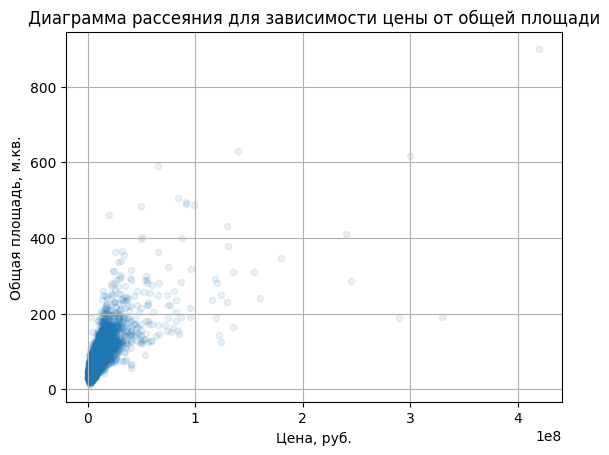

In [106]:
data.sort_values(by='last_price').plot(
    x='last_price', 
    y='total_area',
    kind='scatter',
    style='o',
    grid=True, 
    alpha=0.1
) 

plt.title('Диаграмма рассеяния для зависимости цены от общей площади')
plt.xlabel('Цена, руб.')
plt.ylabel('Общая площадь, м.кв.')
plt.grid(True)

plt.show()

Построим диаграмму рассеяния для зависимости цены от жилой площади.

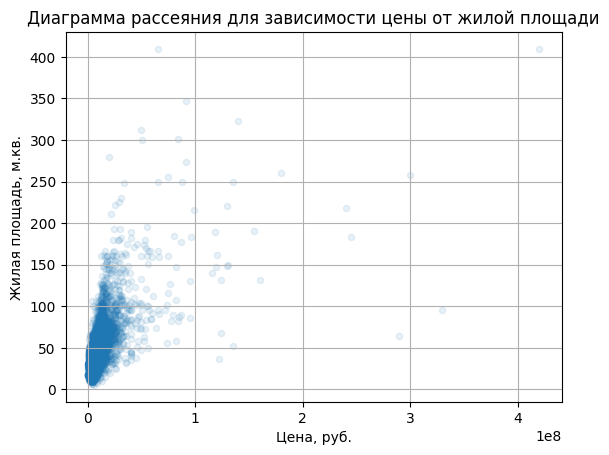

In [107]:
data.sort_values(by='last_price').plot(
    x='last_price', 
    y='living_area',
    kind='scatter',
    style='o',
    grid=True, 
    alpha=0.1
) 
plt.title('Диаграмма рассеяния для зависимости цены от жилой площади')
plt.xlabel('Цена, руб.')
plt.ylabel('Жилая площадь, м.кв.')
plt.grid(True)

plt.show()

Построим диаграмму рассеяния для зависимости цены от площади кухни.

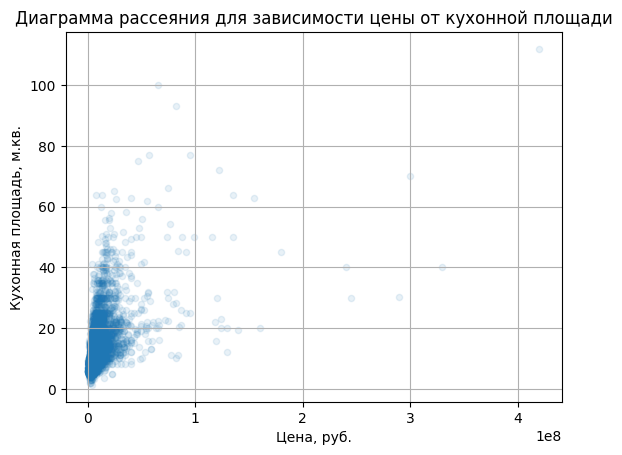

In [108]:
data.sort_values(by='last_price').plot(
    x='last_price', 
    y='kitchen_area',
    kind='scatter',
    style='o',
    grid=True, 
    alpha=0.1
) 
plt.title('Диаграмма рассеяния для зависимости цены от кухонной площади')
plt.xlabel('Цена, руб.')
plt.ylabel('Кухонная площадь, м.кв.')
plt.grid(True)

plt.show()

Построим диаграмму рассеяния для зависимости цены от количества комнат.

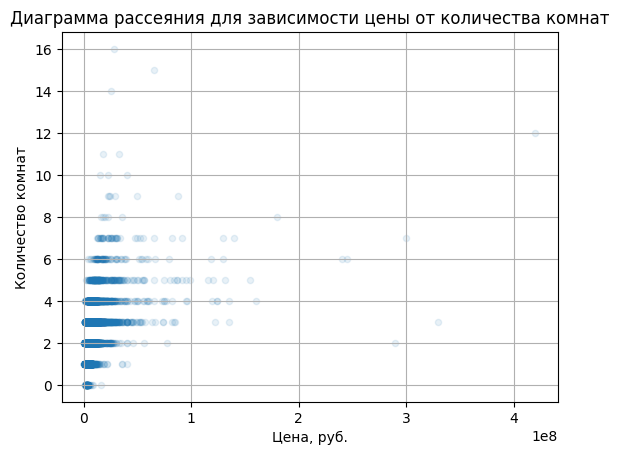

In [109]:
data.sort_values(by='last_price').plot(
    x='last_price', 
    y='rooms',
    kind='scatter',
    style='o',
    grid=True, 
    alpha=0.1
) 
plt.title('Диаграмма рассеяния для зависимости цены от количества комнат')
plt.xlabel('Цена, руб.')
plt.ylabel('Количество комнат')
plt.grid(True)

plt.show()

In [110]:
print('Величина корреляции цены от общей площади:', data['last_price'].corr(data['total_area']))
print('Величина корреляции цены от жилой площади:', data['last_price'].corr(data['living_area']))
print('Величина корреляции цены от площади кухни:', data['last_price'].corr(data['kitchen_area']))
print('Величина корреляции цены от количества комнат:', data['last_price'].corr(data['rooms']))

Величина корреляции цены от общей площади: 0.7084757138988932
Величина корреляции цены от жилой площади: 0.6172997659282518
Величина корреляции цены от площади кухни: 0.538132002976071
Величина корреляции цены от количества комнат: 0.4026198026177411


Имеется прямая зависимость между ценой и общей площадью, жилой площадью, площадью кухни и количеством комнат. Наибольшая корреляция между ценой квартиры и общей площадью.

**Изучим, как цена зависит от этажа, на котором расположена квартира**

In [111]:
data['last_price'][data['floor_type'] == 'последний'].mean()

np.float64(7439594.566530194)

In [112]:
data['last_price'][data['floor_type'] == 'другой'].mean()

np.float64(6956598.073087363)

In [113]:
data['last_price'][data['floor_type'] == 'первый'].mean()

np.float64(5090766.732824427)

На последнем этаже самая высокая цена квартир.
На первом самая низкая.

**Изучим, как цена зависит от даты размещения объявления**

Построим график зависимости цены от дня недели.

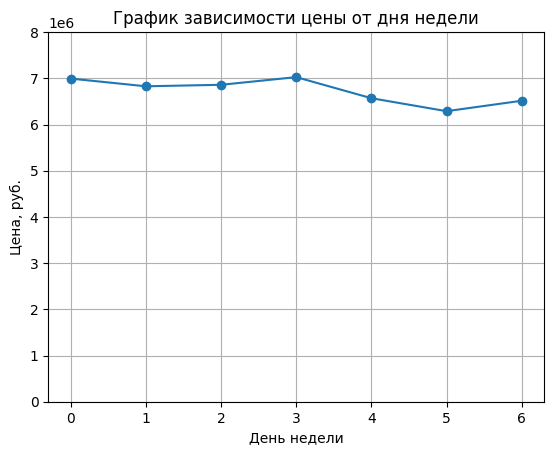

day_of_week
0    6.994078e+06
1    6.827292e+06
2    6.860268e+06
3    7.025796e+06
4    6.569428e+06
5    6.288883e+06
6    6.514597e+06
Name: last_price, dtype: float64

In [114]:
average_price_per_day = data.groupby('day_of_week')['last_price'].mean()
average_price_per_day.plot(
    style='o-',
    grid=True
)
plt.ylim(0, 8000000)
plt.title('График зависимости цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена, руб.')
plt.show()
data.groupby('day_of_week')['last_price'].mean()

Посмотрим на сколько изменяется цена в разные дни недели.

In [115]:
data.groupby('day_of_week')['last_price'].mean().max() / data.groupby('day_of_week')['last_price'].mean().min()

np.float64(1.1171772351742721)

В зависимости от дня недели цена может меняться на 12%. Наименьшая цена у объектов, которые публикуют в субботу.

Построим график зависимости цены от месяца.

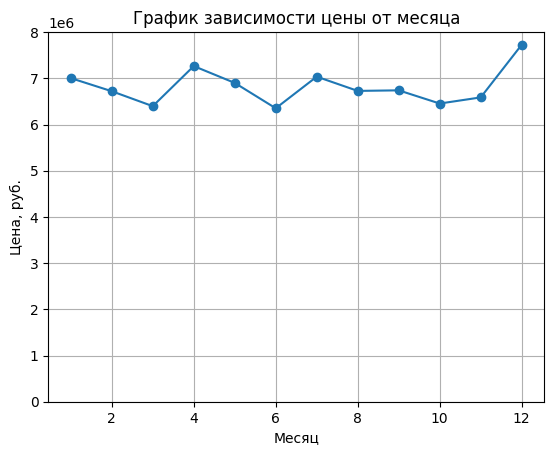

month
1     7.004364e+06
2     6.720456e+06
3     6.397296e+06
4     7.264918e+06
5     6.900425e+06
6     6.351714e+06
7     7.035646e+06
8     6.727653e+06
9     6.739816e+06
10    6.454357e+06
11    6.587099e+06
12    7.726782e+06
Name: last_price, dtype: float64

In [116]:
average_price_per_month = data.groupby('month')['last_price'].mean()
average_price_per_month.plot(
    style='o-',
    grid=True
)
plt.ylim(0, 8000000)
plt.title('График зависимости цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена, руб.')
plt.show()
data.groupby('month')['last_price'].mean()

Посмотрим на сколько изменяется цена в разные месяцы.

In [117]:
data.groupby('month')['last_price'].mean().max() / data.groupby('month')['last_price'].mean().min()

np.float64(1.216487767023135)

В зависимости от месяца цена может меняться на 22%. Наибольшая цена у объектов, которые публикуют в декабре.

Построим график зависимости цены от года.

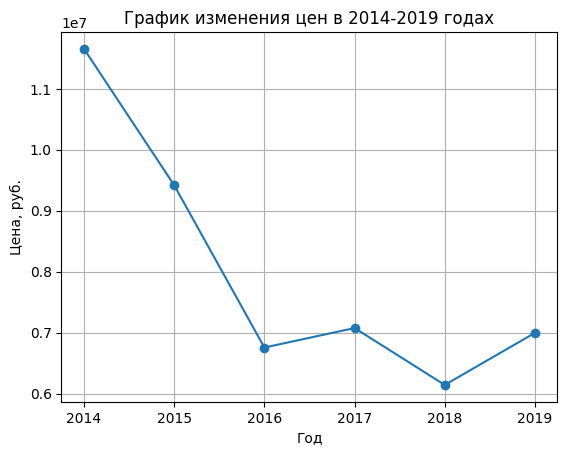

In [118]:
average_price_per_year = data.groupby('year')['last_price'].mean()
average_price_per_year.plot(
    style='o-',
    grid=True
)
plt.title('График изменения цен в 2014-2019 годах')
plt.xlabel('Год')
plt.ylabel('Цена, руб.')
plt.show()

In [119]:
data.groupby('year')['year'].count()

year
2014      71
2015     577
2016    1337
2017    4241
2018    5305
2019    2073
Name: year, dtype: int64

Можно сказать что полная стоимость недвижимости с 2014 по 2016 значительно снизилась. Однако 2014 год можно считать не репрезентативным, так как  этот год было опубликовано только 72 объявления.

Цены в 2018 году были немного ниже чем в 2017 и 2019 году.

**Изучим среднюю цену одного квадратного метра**

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [120]:
price_stat = data.pivot_table(
    values=['price_per_sqm'], 
    index='normalized_name', 
    aggfunc=['count', 'mean']
)
price_stat.columns = ['count', 'mean']
price_stat = price_stat.sort_values(by='count', ascending=False)
price_stat.head(10)

,count,mean
normalized_name,,
Санкт-Петербург,9527,115030.126565
Всеволожск,253,67465.035804
Пушкин,222,103779.905092
Мурино,212,87678.654434
Шушары,205,79172.285296
Колпино,196,75990.160030
Кудрово,185,96321.023355
Петергоф,142,85228.159131
Парголово,134,90939.082148


Среди десяти населённых пунктов с наибольшим числом объявлений наибольшая цена за квадратный метр в Санкт-Петербурге, самая низкая в Всеволожске.

**Вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра**

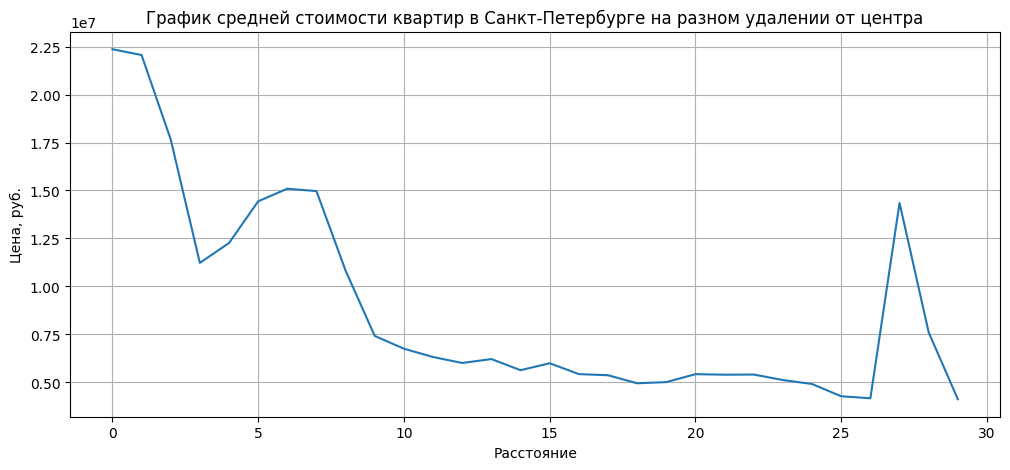

In [121]:
price_by_distance = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_km')['last_price'].mean()
plt.figure(figsize=(12, 5))
price_by_distance.plot(grid=True)
plt.title('График средней стоимости квартир в Санкт-Петербурге на разном удалении от центра')
plt.xlabel('Расстояние')
plt.ylabel('Цена, руб.')
plt.show()

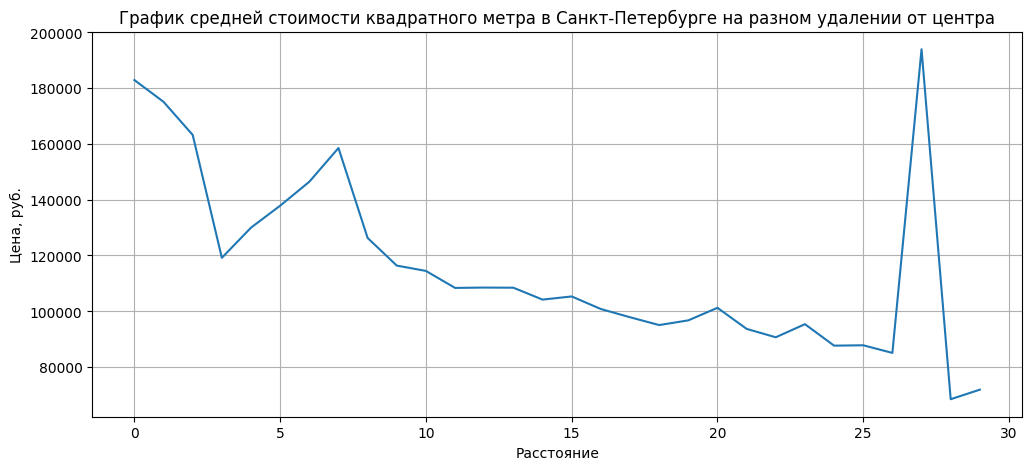

In [122]:
price_per_sqm_by_distance = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_km')['price_per_sqm'].mean()
plt.figure(figsize=(12, 5))
price_per_sqm_by_distance.plot(grid=True)
plt.title('График средней стоимости квадратного метра в Санкт-Петербурге на разном удалении от центра')
plt.xlabel('Расстояние')
plt.ylabel('Цена, руб.')
plt.show()

In [123]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_km')['last_price'].count()

city_centers_km
0.0      16
1.0     130
2.0     209
3.0     232
4.0     419
5.0     537
6.0     339
7.0     246
8.0     377
9.0     373
10.0    447
11.0    710
12.0    984
13.0    901
14.0    814
15.0    985
16.0    757
17.0    527
18.0    132
19.0     96
20.0     23
21.0     60
22.0     94
23.0     55
24.0      4
25.0      8
26.0     15
27.0      1
28.0      1
29.0      5
Name: last_price, dtype: int64

В таблице имеется мало объектов на расстоянии более 23 км от цента города. Такую выборку можно считать не репрезентативной и не учитывать для анализа.

Можно сделать вывод, что недвижимость дешевеет по мере удаления от центра города. Самые дорогие объекты находется непосредственно в центре города и на удалении 5-7 км от центра.

**Промежуточный итог:**

В ходе проведения исследовательского анализа данных:
* Изучены отдельные параметры объектов недвижимости. Были произведены поиск и удаление аномальных значений в данных. 
* Изучено как быстро продавались квартиры. 
* Определено как разные факторы влияют на стоимость квартир.
* Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
* Вычислина зависимость стоимости квартир в Санкт-Петербурге на разном удалении от центра.

<a class='anchor' id="link5"></a>
## Общий вывод

**Целью проекта** было исследовать архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет и научиться определять рыночную стоимость объектов недвижимости. 

**Задачи**, которые для этого были решены:
* проведена предобработка данных
* проведен исследовательский анализ данных 
* установлены параметры, влияющие на цену объектов


В ходе предобработки данных была изучена общая информация о предоставленных данных. Были проверены пропущенные данные. 
* Строки с пропусками в столбцах "Всего этажей в доме" и "Название населённого пункта" были удалены.
* Пропуски в столбце "Апартаменты", "Число балконов" были заполнены.
* Пропуски в столбцах "Расстояние до ближайшего аэропорта", "Расстояние до центра города", "Число парков в радиусе 3 км", "Расстояние до ближайшего парка", "Число водоёмов в радиусе 3 км", "Расстояние до ближайшего водоёма", "Сколько дней было размещено объявление (от публикации до снятия)" появились в связи с особенностями работы сервиса Яндекс.Недвижимость. Данные пропуски несут в себе информацию, поэтому удалять или заполнять их не нужно.
* Пропуски в столбце "Высота потолков" были оставленны без изменения, потому что это могло бы повлиять на дальнейшее исследование.

Были изучены типы данных. Данные были приведены к нужному типу.

Названия населенных пунктов были очищенны от неявных дубликатов.

Были проверены отдельные параметры объектов, произведены поиск и обработка аномальных значений в данных. 

В ходе исследовательского анализа данных было **установлено** следующее:
* Медианная площадь объектов недвижимости составляет 52 м.кв. Средняя площадь 60.3 м.кв.
* 92% квартир имеют 1, 2 или 3 комнаты.
* Наиболее частые жилые площади для однокомнатных, двукомнатных и трехкомнатных квартир находятся возле значений 17, 30 и 43 м.кв. соответственно.
* Медианная площадь кухни составляет 9 м.кв.
* На первом и последнем этаже квартиры продают чаще, чем на любом из других этажей.
* Наиболее часто продаются квартиры в пятиэтажках и девятиэтажках.
* Для объектов, у которых указано расстояние до ближайшего парка среднее расстояние 476 мертов. Медианное расстояние 447.5 метров.
* Изучено как быстро продавались квартиры. Среднее время продажи объекта недвижимости 193 дня. Медианное значение 106 дней. Продажу быстрее 45 дней можно считать быстрой. Продажи, которые занимают более 251 дня можно считать долгими. Продажи, которые занимают более 560 дней (1,5 года) можно условно считать ненормальными. 
* Посчитана средняя цена одного квадратного метра. Среди десяти населённых пунктов с наибольшим числом объявлений наибольшая цена за квадратный метр в Санкт-Петербурге (115 тыс.руб.), самая низкая в Всеволожске (68 тыс.руб.).
* Вычислина зависимость стоимости квартир в Санкт-Петербурге на разном удалении от центра. В среднем недвижимость дешевеет по мере удаления от центра города. Самые дорогие объекты находется непосредственно в центре города и на удалении 5-7 км от центра.

Были исследованы и установлены **параметры, влияющие на цену объектов:**
* Определено как цена зависит от общей площади, жилой площади, площади кухни и количества комнат.
Везде прослеживается прямая зависимость
Величина корреляции цены от общей площади: 0.71
Величина корреляции цены от жилой площади: 0.62
Величина корреляции цены от площади кухни: 0.54
Величина корреляции цены от количества комнат: 0.40

* Изучено, как цена зависит от этажа, на котором расположена квартира. На последнем этаже самая высокая цена квартир. На первом самая низкая.

* Изучено, как цена зависит от даты размещения объявления. Прослеживается слабая зависимость между днем публикации объявления и ценой объекта. Тем не менее наименьшая цена у объектов, которые публикуют в субботу. В зависимости от месяца цена может меняться на 22%. Наибольшая цена у объектов, которые публикуют в декабре.

* Полная стоимость недвижимости с 2014 по 2016 значительно снизилась. Однако 2014 год можно считать не репрезентативным, так как этот год было опубликовано только 72 объявления. Цены в 2018 году были немного ниже чем в 2017 и 2019 году.